<a href="https://colab.research.google.com/github/sabitendu/Capstone-Project-on-Credit-Card-Default-Predictiion/blob/main/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm

#import necessary libraries  for feature engineering
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#import libraries for  machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#import libraries for hyperparameter tuning and metric score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,precision_score, recall_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix

### Dataset Loading

In [4]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
filepath='/content/drive/MyDrive/Alma Better/Machine Learning/Credit_card_default/credit card clients.xls'
credit_df=pd.read_excel(filepath,header=1)

### Dataset First View

In [6]:
# Viewing the top 5 rows to take a glimpse of the data
credit_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
credit_df.shape

(30000, 25)

In [8]:
print(f"the number of rows {credit_df.shape[0]}, and number of columns are {credit_df.shape[1]}")

the number of rows 30000, and number of columns are 25


### Dataset Information

In [9]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**All Columns are Numerical**

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
duplicate_value=len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",duplicate_value)

The number of duplicate values in the data set is =  0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
credit_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

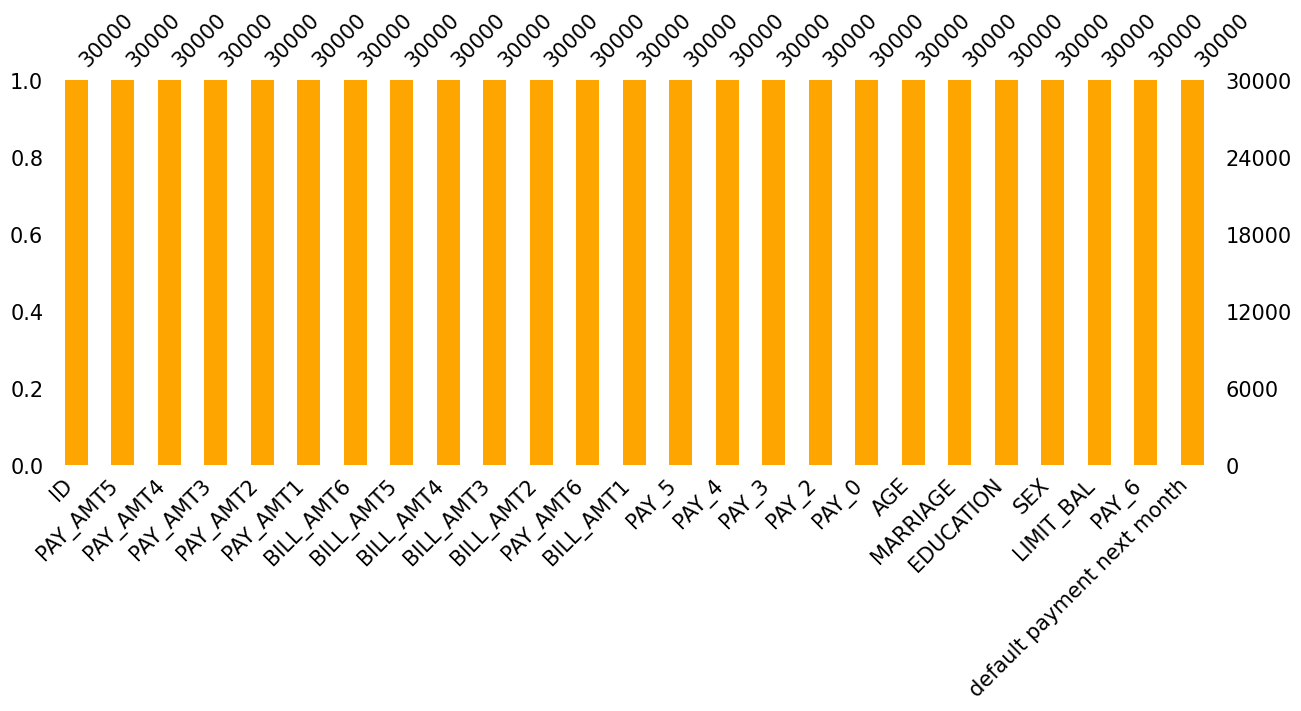

In [12]:
# Visualizing the missing values
msno.bar(credit_df, color='orange',sort='ascending', figsize=(15,5), fontsize=15)

### What did you know about your dataset?

A Taiwanese credit card company wants to better anticipate the chance of default for its customers and identify the primary elements that influence this likelihood. This would let the issuer decide who to offer a credit card to and what credit limit to supply. It would also help the issuer gain a better understanding of their current and potential clients, which would drive their future strategy, including their plans to offer tailored credit products to their customers.

The above dataset has 30000 rows and 25 columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [14]:
# Dataset Describe
credit_df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

### Variables Description

**As the response variable in this study, a binary variable, default payment (Yes = 1, No = 0), was used. This study analysed the literature and used the following variables as explanatory variables:**

* **ID:** Unique ID of each client
* **LIMIT_BAL:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* **Gender:** 1 = male; 2 = female
* **Education:** 1 = graduate school; 2 = university; 3 = high school; 4 = others
* **Marital status:** 1 = married; 2 = single; 3 = others.
* **Age:** Age in years

**History of past payment.**

From April to September of 2005, we tracked historical monthly payment records.The payback status is measured using the following scale: -2=no spending, -1=paid in full, and 0=use of revolving credit (paid minimum only).

1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

* **PAY_0:** Repayment status in September, 2005

* **PAY_2:** Repayment status in August, 2005

* **PAY_3:** Repayment status in July, 2005

* **PAY_4:** Repayment status in June, 2005

* **PAY_5:** Repayment status in May, 2005

* **PAY_6:** Repayment status in April, 2005

#**Amount of bill statement (NT dollar).**
* **BILL_AMT1:** Amount of bill statement in September, 2005

* **BILL_AMT2:** Amount of bill statement in August, 2005

* **BILL_AMT3:** Amount of bill statement in July, 2005

* **BILL_AMT4:** Amount of bill statement in June, 2005

* **BILL_AMT5:** Amount of bill statement in May, 2005

* **BILL_AMT6:** Amount of bill statement in April, 2005

#**Amount of previous payment (NT dollar).**
* **PAY_AMT1:** Amount of previous payment in September, 2005

* **PAY_AMT2:** Amount of previous payment in August, 2005

* **PAY_AMT3:** Amount of previous payment in July, 2005

* **PAY_AMT4:** Amount of previous payment in June, 2005

* **PAY_AMT5:** Amount of previous payment in May, 2005

* **PAY_AMT6:** Amount of previous payment in April, 2005

* **default.payment.next.month:** Default payment (1=yes, 0=no)


### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in credit_df.columns.tolist():
  print("No. of unique values in ",i,"is",credit_df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
#renaming dependendent Variable
credit_df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
#Changing name of some columns for simplicity and better understanding
credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)



In [17]:
#Dropping ID column because there is no use of ID further.
credit_df.drop('ID',axis=1,inplace=True)

In [18]:
#copy the original data to a different dataframe for better visualisation
df_credit=credit_df.copy()

In [19]:
#replacing values with there labels
df_credit.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df_credit.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'others',5 : 'others',6 : 'others',0 : 'others'}}, inplace=True)
df_credit.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'others',0 : 'others'}}, inplace = True)
df_credit.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [20]:
df_credit.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000  Female  University  Married   24         2        2       -1   
1     120000  Female  University   Single   26        -1        2        0   
2      90000  Female  University   Single   34         0        0        0   
3      50000  Female  University  Married   37         0        0        0   
4      50000    Male  University  Married   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4        0        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689            0            0            0   
1             0         1000         1000         1000            0   
2          1518         1500         1000         1000         1000   
3          2000         2019         1200         1100         1069   
4          2000        36681        10000         9000          689   

   PAY_AMT_APR  IsDefaulter  
0            0          Yes  
1         2000          Yes  
2         5000           No  
3         1000           No  
4          679           No  

[5 rows x 24 columns]

### What all manipulations have you done and insights you found?

We can rename dependent variables and feature names to improve understanding of the feature.

* **converting numerical values** to categorical values for easy comprehension

* **Gender** (one = male, two = female)

* **Education** 1 = graduate school, 2 = university, 3 = high school, and 4 = others.

* **Status of marriage** (1 = married, 2 = single, 3 = other)




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart 1-** **Visualization of Defaulter vs Non-Defaulter**

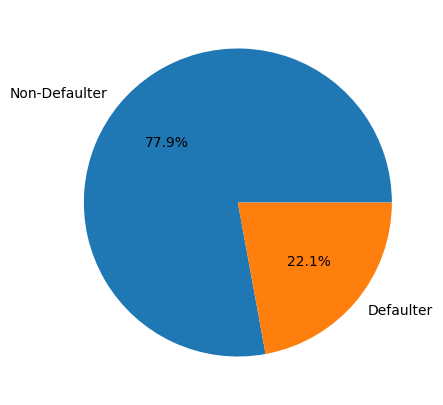

In [21]:
# Visualization of IsDefaulter using pie chart
plt.figure(figsize=(10,5))
plt.pie(x=df_credit['IsDefaulter'].value_counts(),labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart used to represent the  summarizing set of nominal data
 or displays the different value of a given categorical variable (ex- precentage distribution).

##### 2. What is/are the insight(s) found from the chart?

**NO=Payment will not default,Yes=Payment will default**

From the graph we can see that number of defaulter(22%) is less than Non defaulter(78%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, class imbalance can have a negative impact on classification model accuracy, so we must address this issue before putting the data into training.

#### **Chart - 2 Visualisation of Gender Column**

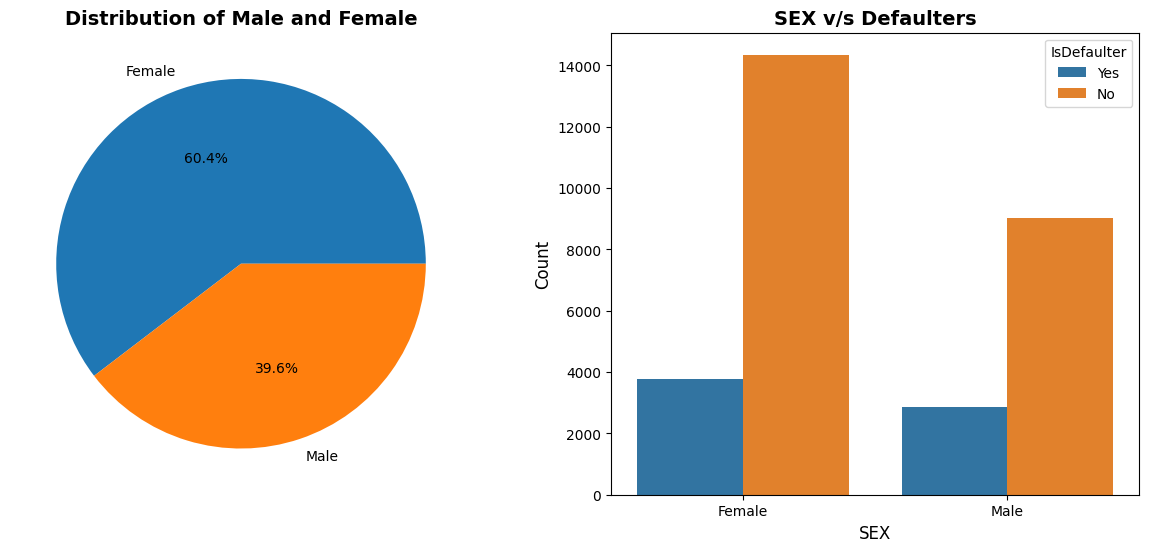

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
#univariate analysis-distribution of male female ratio
ax[0].pie(x=df_credit['SEX'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')
ax[0].set_title('Distribution of Male and Female',fontsize=14,fontweight='bold')
#bivariate analysis -Defaulter and Non-Defaulter distribution between male and female
sns.countplot(x = 'SEX',hue = 'IsDefaulter',data = df_credit,ax=ax[1])
ax[1].set_title('SEX v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel('SEX',fontsize = 12)
ax[1].set_ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie Chart used to represent the summarizing set of nominal data or displays the different value of a given categorical variable.

* The countplot is used to display the number of occurrences of the observation in the categorical variable.
For the visual representation, it employs the concept of a bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Number of Female credit card holder is  more than Male
* Number of Female defaulter is more than Male defaulter

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see, female credit card holders outnumber male credit card holders, thus in order to boost male clients, banks should offer incentives to male customers while also taking care of their female clients in order to grow their business. However, some policies should be made available to male clients in order to limit the possibility of default.


#### **Chart - 3 Visualisation of Education Column**

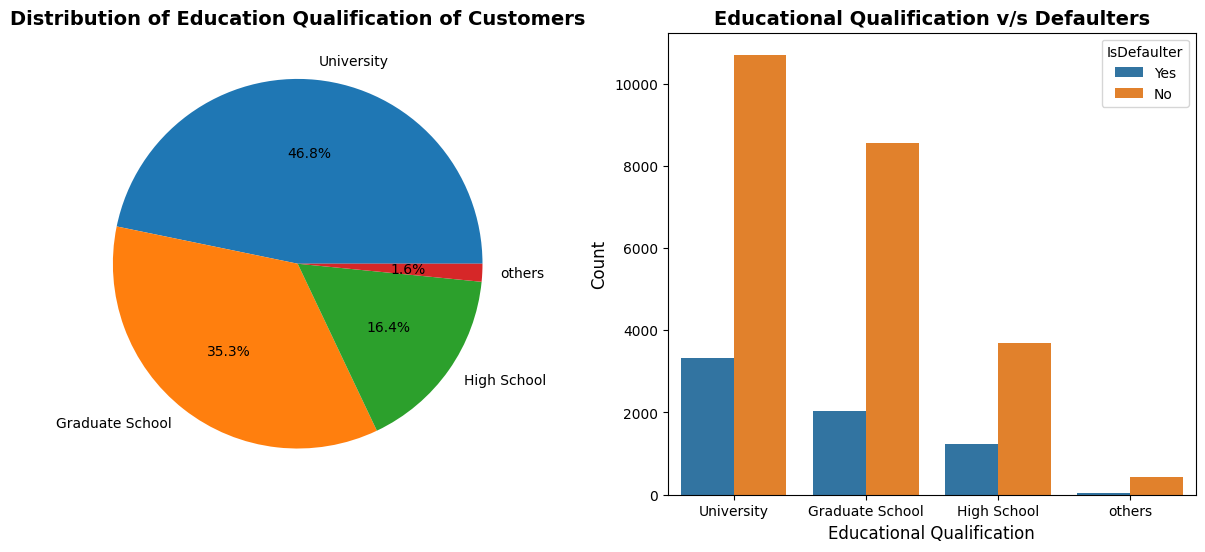

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
#univariate analysis-distribution of educational qualification
ax[0].pie(x=df_credit['EDUCATION'].value_counts(),labels=df_credit['EDUCATION'].value_counts().index,autopct='%1.1f%%')
ax[0].set_title('Distribution of Education Qualification of Customers',fontsize=14,fontweight='bold')
#bivariate analysis -Defaulter and Non-Defaulter distribution between male and female
sns.countplot(x = 'EDUCATION',hue = 'IsDefaulter',data = df_credit,ax=ax[1])
ax[1].set_title('Educational Qualification v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel('Educational Qualification',fontsize = 12)
ax[1].set_ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie Chart used to represent the summarizing set of nominal data or displays the different value of a given categorical variable.

* The countplot is used to display the number of occurrences of the observation in the categorical variable.
For the visual representation, it employs the concept of a bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Most of the customer's educational qualification is university pass out followed by graduate school pass out
* Most number of defaulter is also from University  but  in terms of default ratio university people having less default ratio,high school have most default ratio.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see, the majority of credit card holders are from universities, followed by graduate schools, so banks can target these people to grow their business. As we know, the source of income for high school candidates is very low and their default ratio is also high, so there is no need to focus more on this group of people.

#### **Chart - 4  Visualisation of Marriage Column**

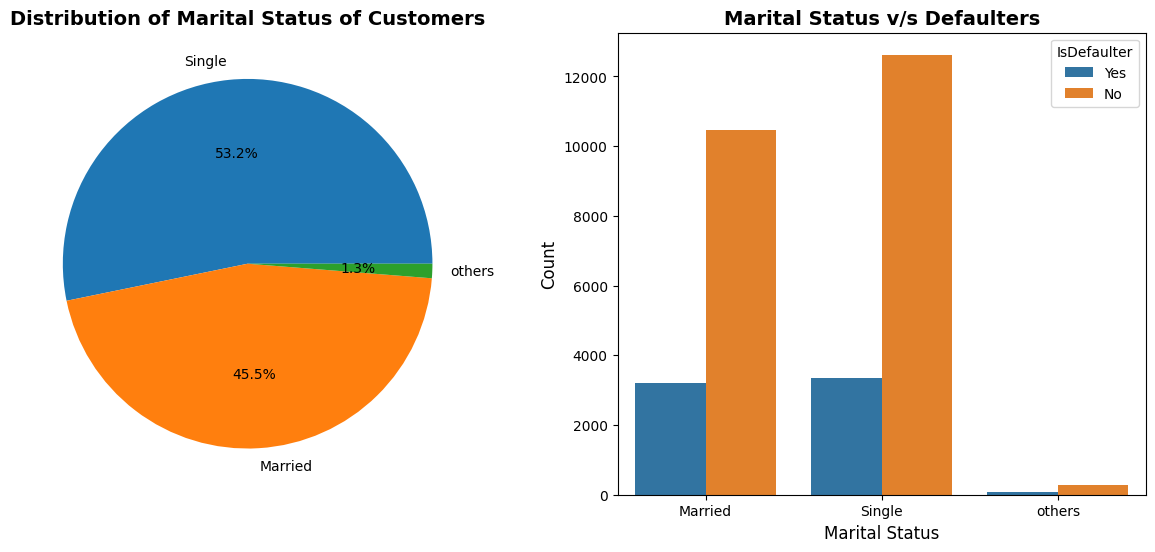

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
#univariate analysis-distribution of Marriage
ax[0].pie(x=df_credit['MARRIAGE'].value_counts(),labels=df_credit['MARRIAGE'].value_counts().index,autopct='%1.1f%%')
ax[0].set_title('Distribution of Marital Status of Customers',fontsize=14,fontweight='bold')
#bivariate analysis -Defaulter and Non-Defaulter distribution between male and female
sns.countplot(x = 'MARRIAGE',hue = 'IsDefaulter',data = df_credit,ax=ax[1])
ax[1].set_title('Marital Status v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel('Marital Status',fontsize = 12)
ax[1].set_ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

* Pie Chart used to represent the summarizing set of nominal data or displays the different value of a given categorical variable.

* The countplot is used to display the number of occurrences of the observation in the categorical variable.
For the visual representation, it employs the concept of a bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Maximum Card holder are single
* Married people have higher default ratio

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Single folks spend more than married people, thus they will use credit cards more frequently.As a result, targeting Single people will undoubtedly enhance sales.


#### **Chart - 5 Visualisation of Age Column**

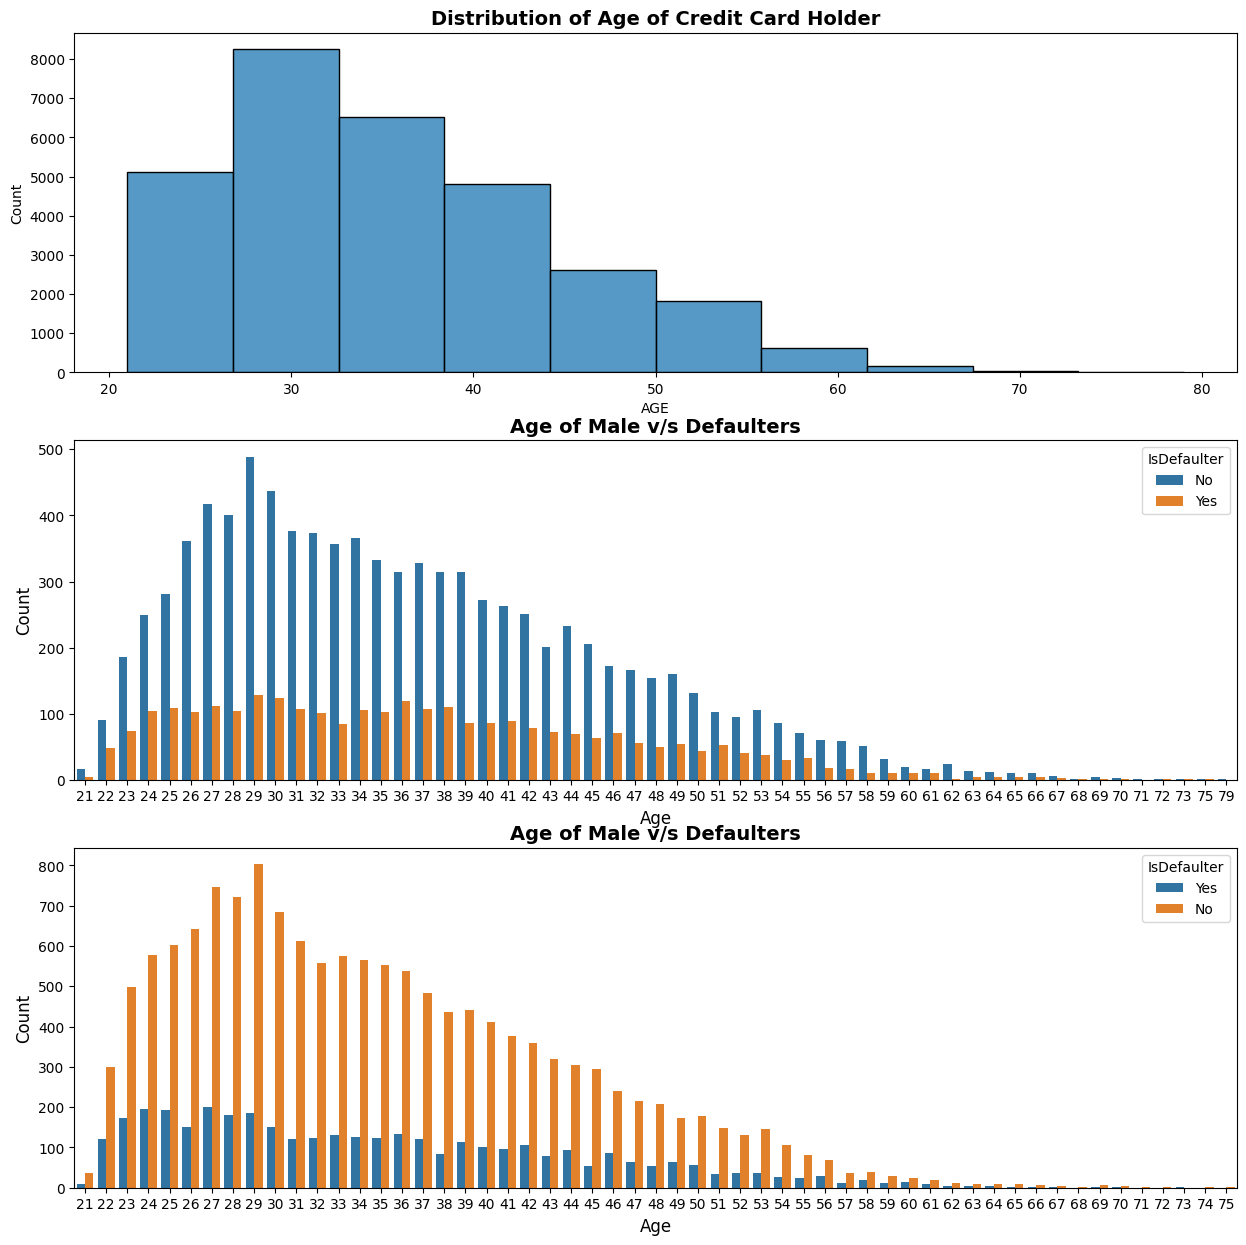

In [25]:
fig,ax=plt.subplots(3,1,figsize=(15,15))
#univariate analysis-distribution of Marriage
age_dist=sns.histplot(x=df_credit['AGE'],ax=ax[0],bins=10)
age_dist.set_title('Distribution of Age of Credit Card Holder',fontsize=14,fontweight='bold')
#Create two dataframe of male and female
Age_male=df_credit[df_credit['SEX']=='Male']
Age_female=df_credit[df_credit['SEX']=='Female']
sns.countplot(x = 'AGE',hue = 'IsDefaulter',data = Age_male,ax=ax[1])
#plot age of male card holder vs Defaulter
ax[1].set_title('Age of Male v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel('Age',fontsize = 12)
ax[1].set_ylabel('Count',fontsize=12)
#plot age of female card holder vs Defaulter
sns.countplot(x = 'AGE',hue = 'IsDefaulter',data = Age_female,ax=ax[2])
ax[2].set_title('Age of Male v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[2].set_xlabel('Age',fontsize = 12)
ax[2].set_ylabel('Count',fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

* A histogram is a traditional visualization tool that counts the number of data that fall into discrete bins to illustrate the distribution of one or more variables.
* The countplot is used to display the number of occurrences of the observation in the categorical variable. For the visual representation, it employs the concept of a bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Most of the credit card holder belongs to 25-30 years
* Number of credit card holder are less above 60 years.
* For equal age ratio of defualter for male and female not varied much
* Above 50 year old the ratio of defaulter has increased

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers are fewer as the majority of defaulters are between the ages of 20 and 25, and over the age of 60. Before issuing the credit card, it must be thoroughly reviewed. Otherwise, it may have a negative impact on corporate growth.

#### **Chart - 6 Visualisation of Default payment next month Column**

Text(0, 0.5, 'Count')

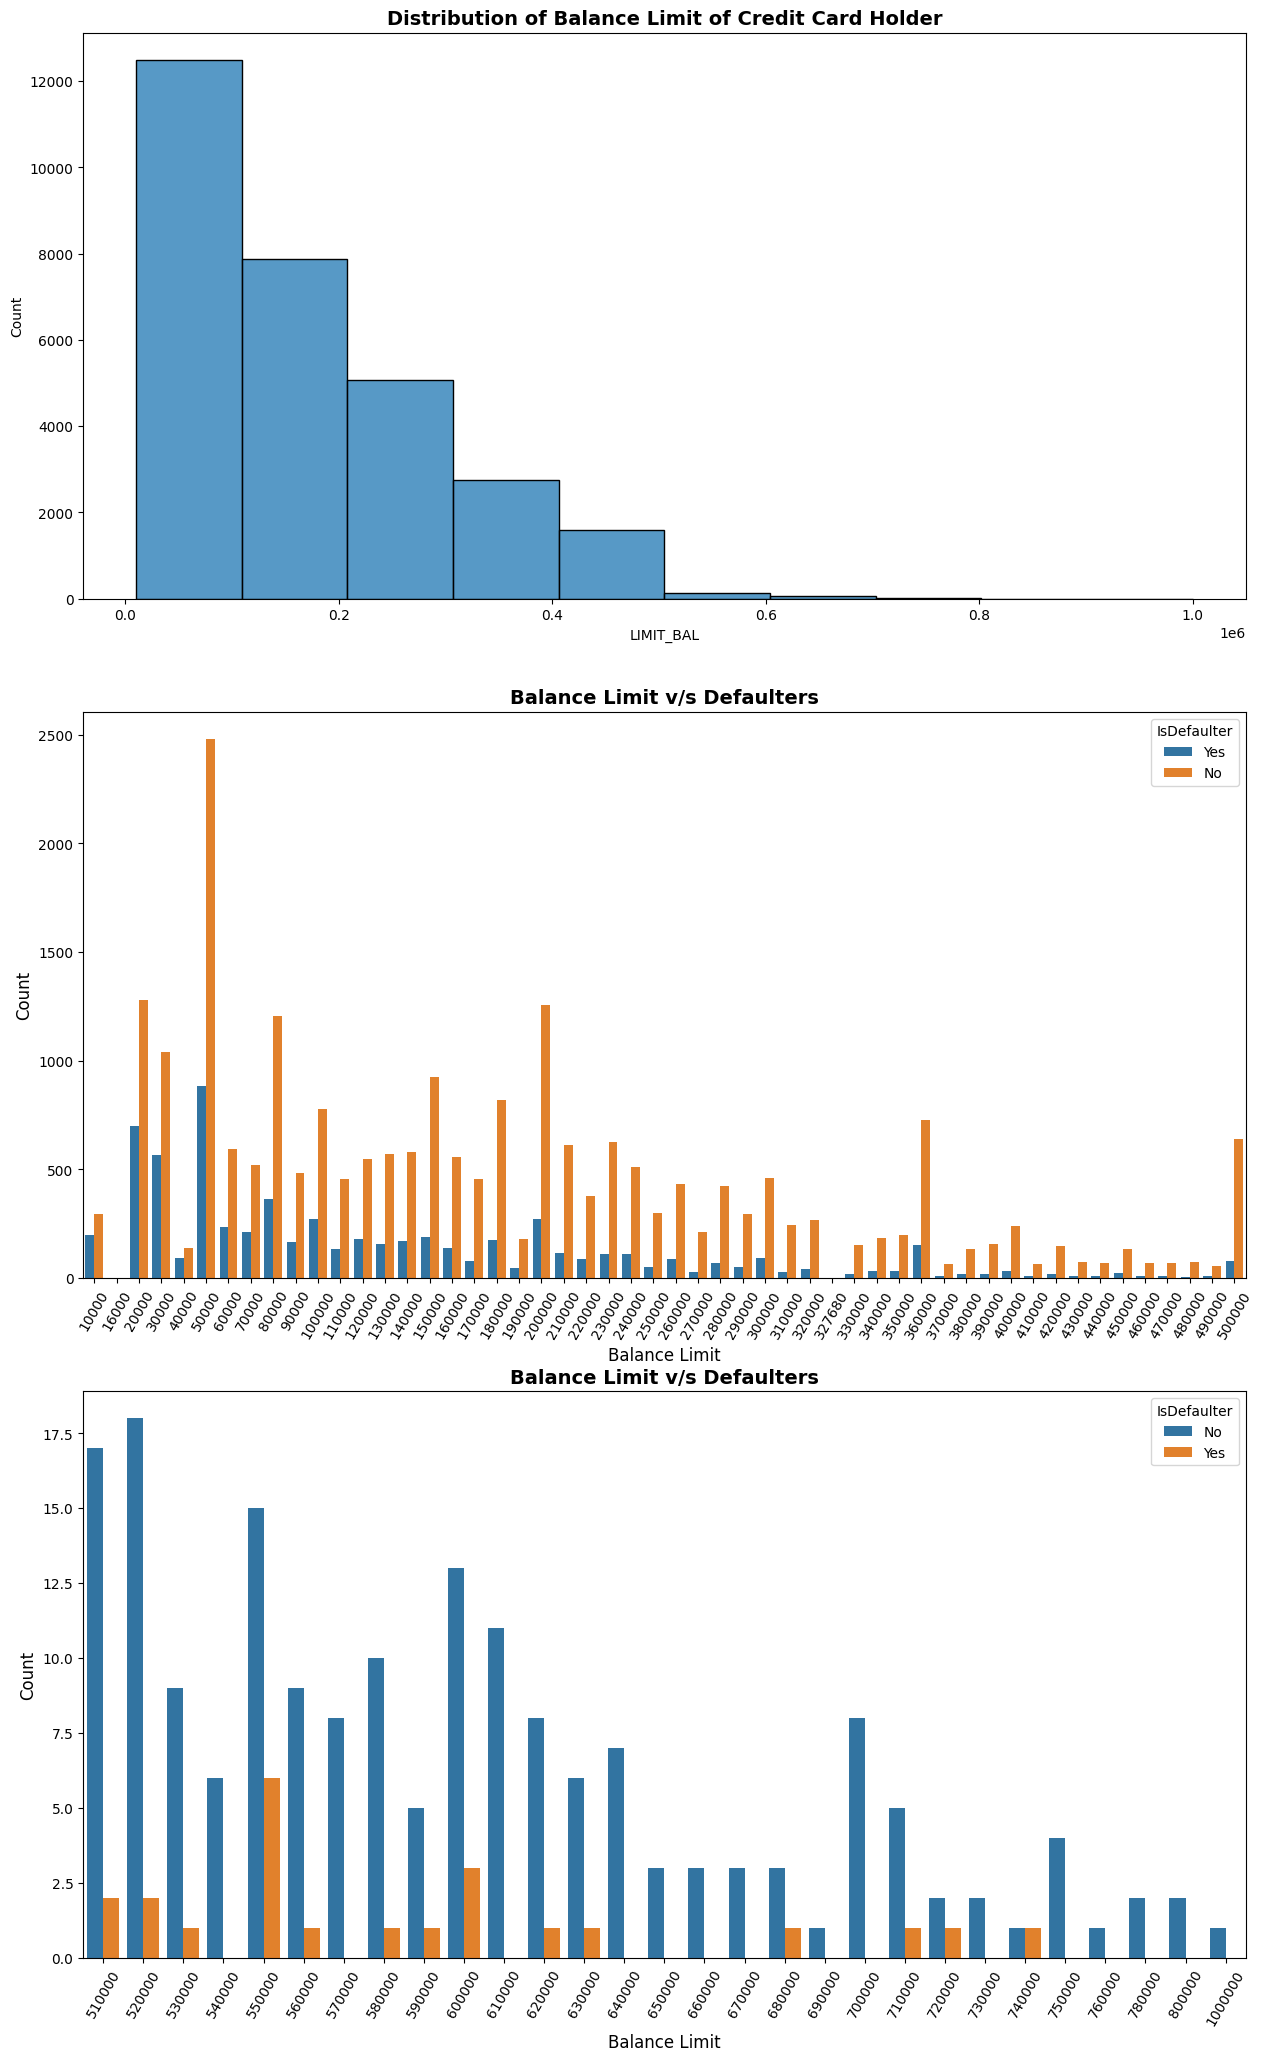

In [26]:
fig,ax=plt.subplots(3,1,figsize=(15,25))
#univariate analysis-distribution of Marriage
age_dist=sns.histplot(x=df_credit['LIMIT_BAL'],ax=ax[0],bins=10)
age_dist.set_title('Distribution of Balance Limit of Credit Card Holder',fontsize=14,fontweight='bold')
Limit_1=df_credit[df_credit['LIMIT_BAL']<=500000]
Limit_2=df_credit[df_credit['LIMIT_BAL']>500000]
#plot age of male card holder vs Defaulter
sns.countplot(x = 'LIMIT_BAL',hue = 'IsDefaulter',data = Limit_1,ax=ax[1])
ax[1].set_title('Balance Limit v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[1].tick_params(axis='x', labelrotation= 60)
ax[1].set_xlabel('Balance Limit',fontsize = 12)
ax[1].set_ylabel('Count',fontsize=12)
#plot age of male card holder vs Defaulter
sns.countplot(x = 'LIMIT_BAL',hue = 'IsDefaulter',data = Limit_2,ax=ax[2])
ax[2].set_title('Balance Limit v/s Defaulters', fontsize = 14, fontweight = 'bold')
ax[2].tick_params(axis='x', labelrotation= 60)
ax[2].set_xlabel('Balance Limit',fontsize = 12)
ax[2].set_ylabel('Count',fontsize=12)

##### 1. Why did you pick the specific chart?

* A histogram is a traditional visualization tool that counts the number of data that fall into discrete bins to illustrate the distribution of one or more variables.
* The countplot is used to display the number of occurrences of the observation in the categorical variable. For the visual representation, it employs the concept of a bar chart.

##### 2. What is/are the insight(s) found from the chart?

* Maximum Credit card limit is below 100000 .
* Very few Credit Limit are above 500000.
*  When credit limit is less than equal to 50k deault ratio is high.
*  Default ratio is exceptionally high when credit limit is 550000 and 600000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers with credit limits of $50,000 or more are more likely to default, so the bank should charge them in the event of a default and may cut their limit to avoid any form of damage to the company.

#### **Chart - 7 Monthly wise repayment  vs Default**

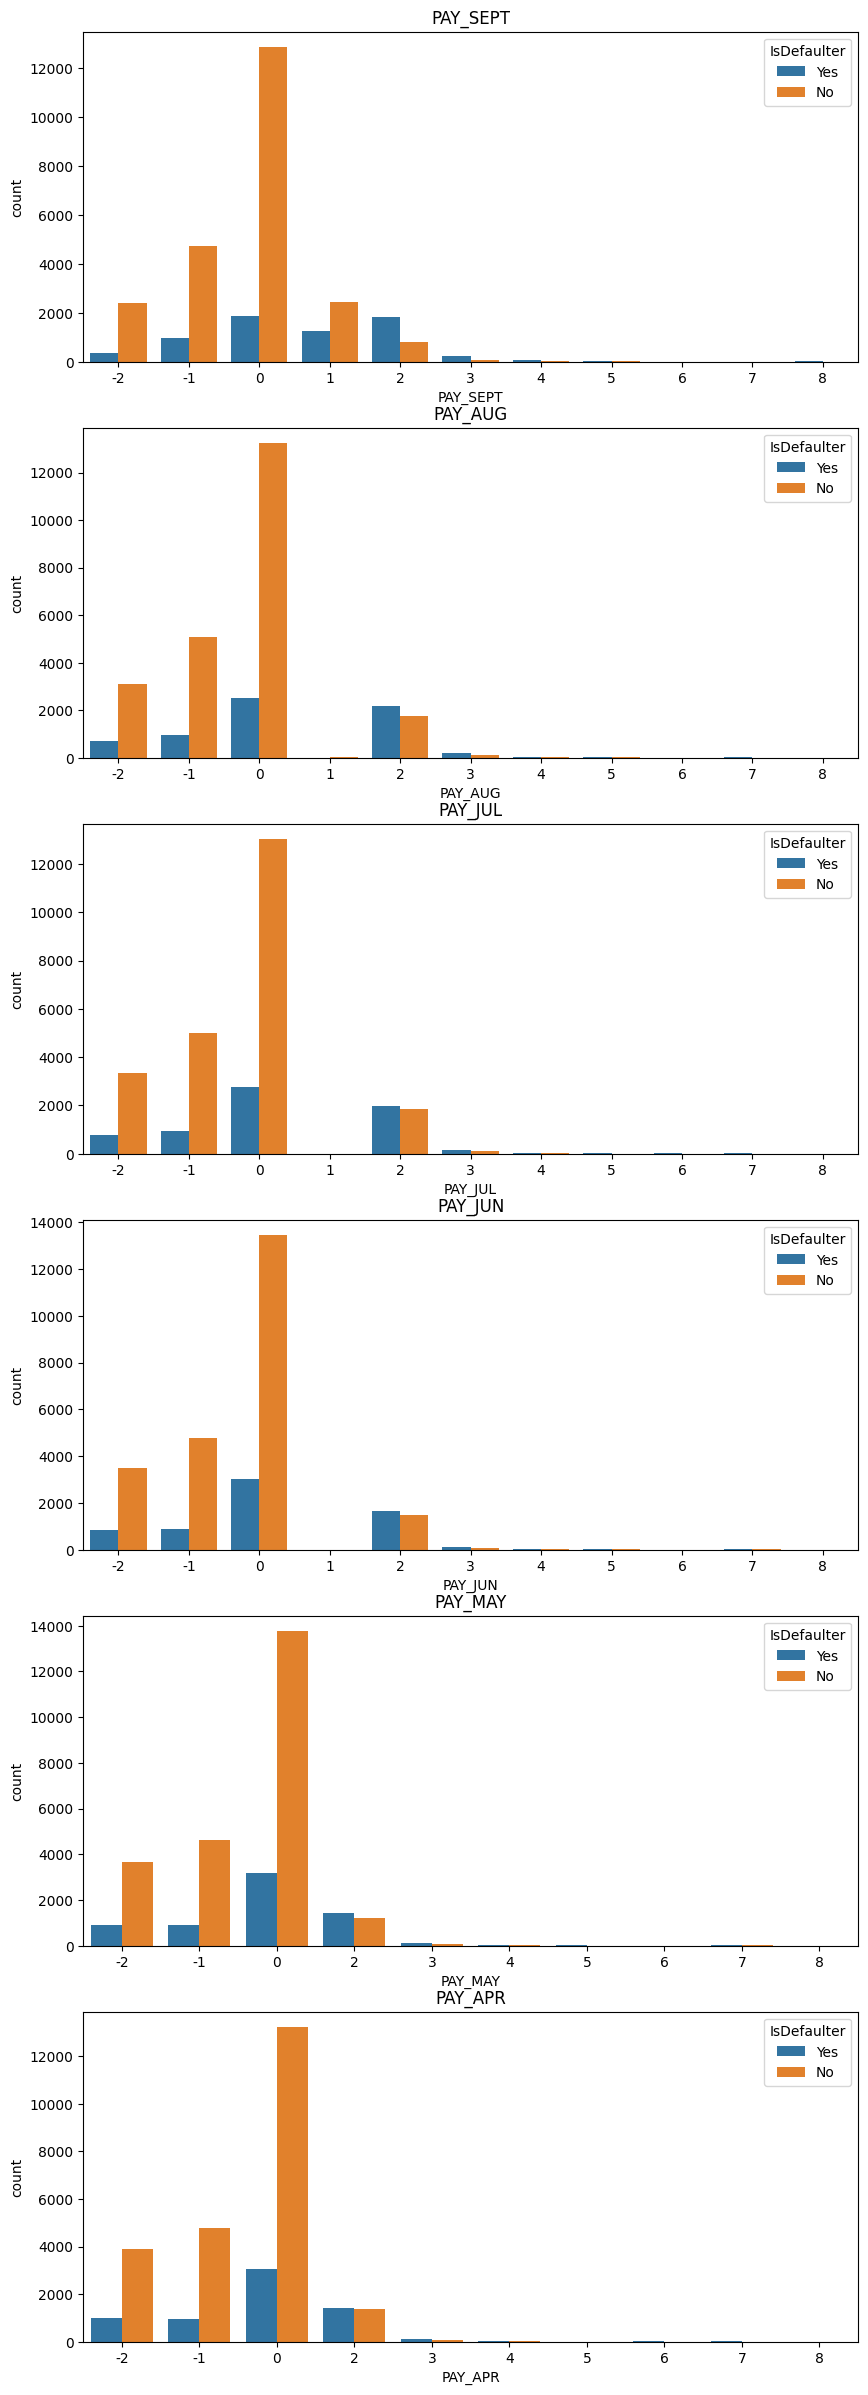

In [27]:
# create a list of monthly repayment columns
repay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
# plot the univariate distribution
fig,ax=plt.subplots(len(repay_col),1,figsize=(10,30))
for i,col in enumerate(repay_col):
  #plot the bivariate with isdefaulter
  sns.countplot(x = col,hue = 'IsDefaulter',data = df_credit,ax=ax[i])
  ax[i].set_title(col)


##### 1. Why did you pick the specific chart?

The countplot is used to display the number of occurrences of the observation in the categorical variable.

For the visual representation, it employs the concept of a bar chart.

##### 2. What is/are the insight(s) found from the chart?

No consumption = 2

-1 = fully paid

0 = usage of revolving credit (paid only the minimum)

1 = one-month payment delay

2 = two-month payment delay,... 8 = eight-month payment delay, 9 = nine-month payment delay and above)

We can see that customers who pay only the minimum amount have a higher risk of default.Customers in this category also mostly use credit cards.

When payment delay is greater than 2 month default ratio is very high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



When payment delay is greater than 2 month,default ratio is high so it has negative impact on buisness. So when customer is is delaying 1 month company should concerned.

#### **Chart - 8 Visualisation of Monthly Billing Amount**

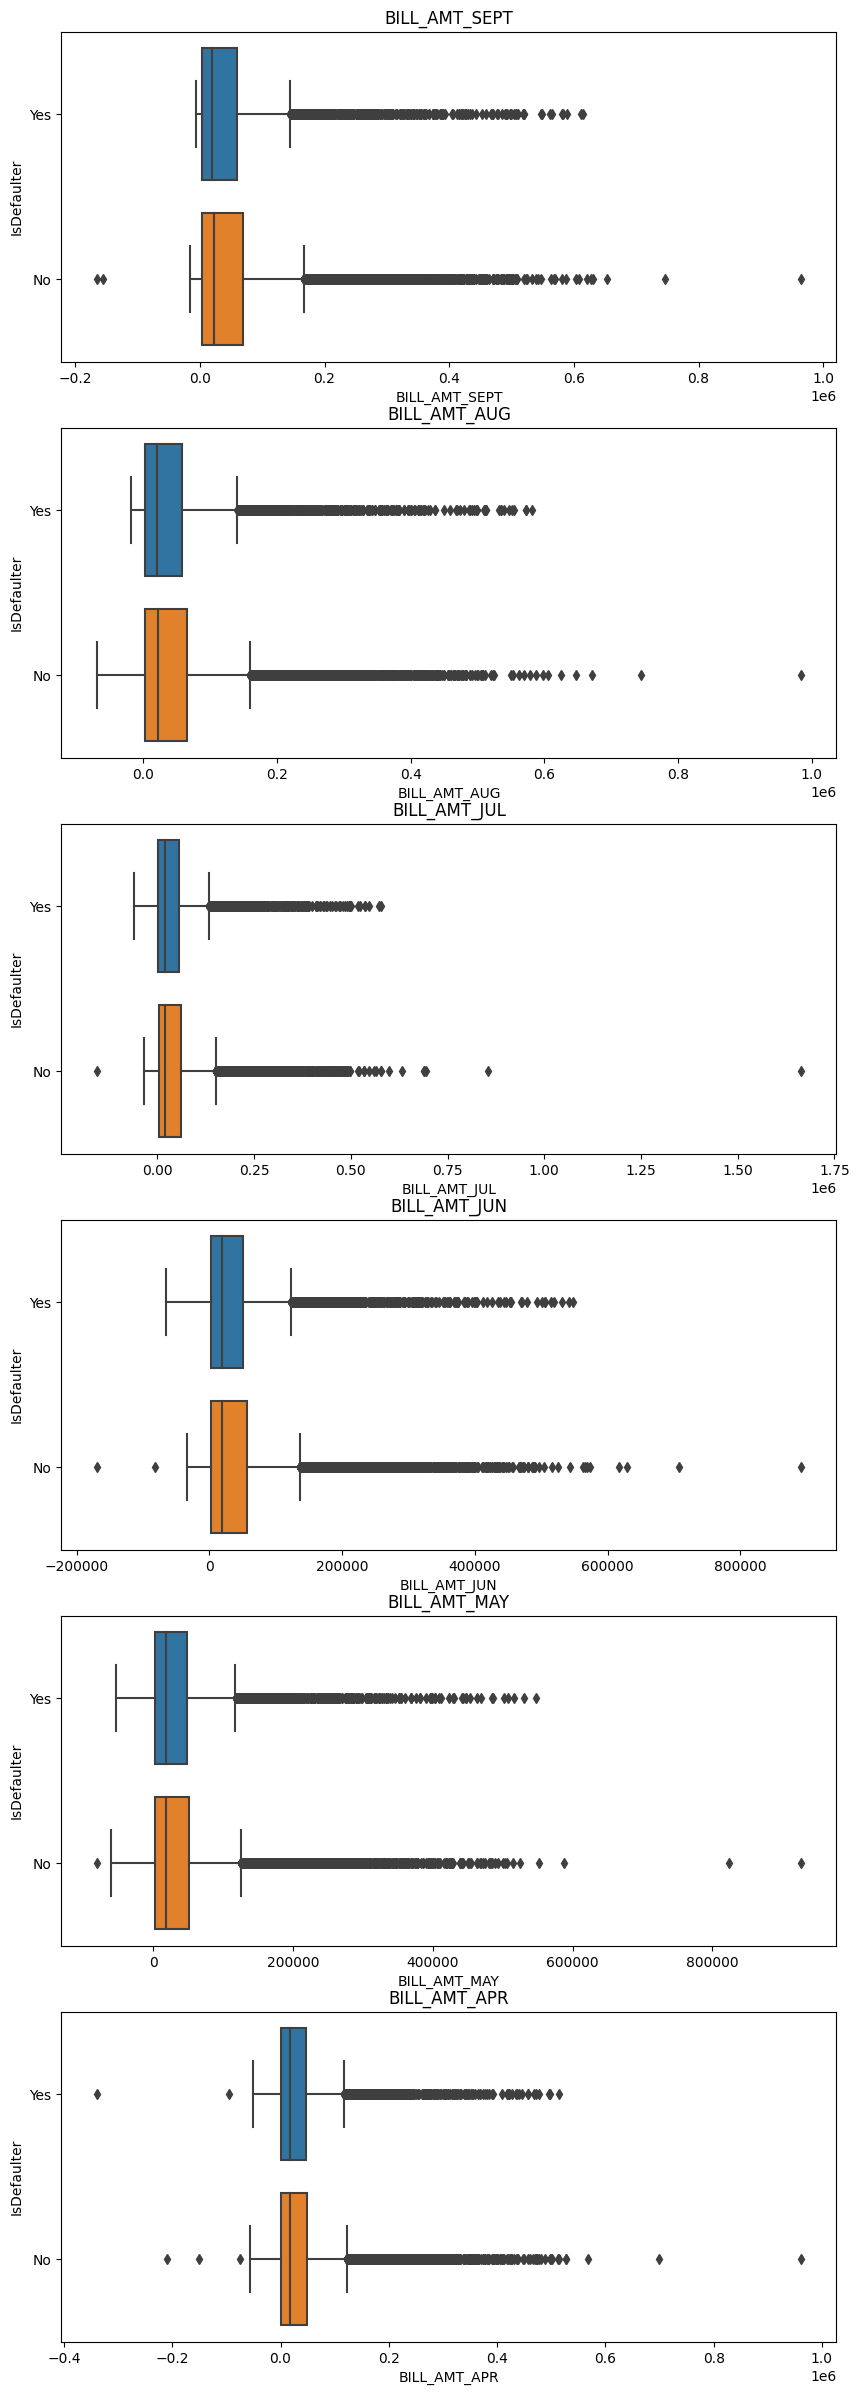

In [28]:
# Chart - 9 visualization code
monthlybill_col = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']
# plot the univariate distribution
fig,ax=plt.subplots(len(monthlybill_col),1,figsize=(10,30))
for i,col in enumerate(monthlybill_col):
  #plot the bivariate with isdefaulter
  sns.boxplot(x = col,y='IsDefaulter',data = df_credit,ax=ax[i])
  ax[i].set_title(col)


##### 1. Why did you pick the specific chart?

Box plots provide a rapid visual assessment of a dataset's variability. They display the dataset's median, upper and lower quartiles, lowest and maximum values, and any outliers. Outliers in data might show errors or uncommon events.

##### 2. What is/are the insight(s) found from the chart?

From the plots we can see that data distribution of monthly bill has no thick difference between defaulter and non defaulter

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no insight on buisness from the figures.

#### **Chart - 9 Visualization of Amount of Previous Payment vs Bill Amount**

In [ ]:
# Chart - 9 visualization code
previous_col = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
# plot the univariate distribution
fig,ax=plt.subplots(len(previous_col),1,figsize=(10,30))
for i,col in enumerate(previous_col):
  #plot the bivariate with isdefaulter
  sns.scatterplot(x = col,y=monthlybill_col[i],hue='IsDefaulter',data = df_credit,ax=ax[i])
  ax[i].set_title(col)

##### 1. Why did you pick the specific chart?

A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

##### 2. What is/are the insight(s) found from the chart?

When Previous payment is low but Monthly Bill is high there is high possibility of default the payment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When customer is spending exceptionally high according to his his payment history company should concerned.

#### Chart - 10 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure (figsize= (20,10))
sns.heatmap(df_credit.corr(),linewidths=.5,annot=True,cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are graphical representations of the strength of correlations between numerical data.

Correlation plots are used to determine which variables are related to one another and how strong this relationship is.


A correlation plot often has several numerical variables, each represented by a column. Each row represents the relationship between two variables.

favourable numbers imply a favourable relationship, whereas negative values suggest a negative relationship.


##### 2. What is/are the insight(s) found from the chart?

According to the heatmap, some features (for example, PAY_MAY & PAY_APR, BILL_AMT_MAY & BILL_AMT_APR, etc.) are highly associated to each other, but we are not going to eliminate any of them because they contain client transaction details.

#### Chart - 11 - Pair Plot

<Figure size 2000x4000 with 0 Axes>

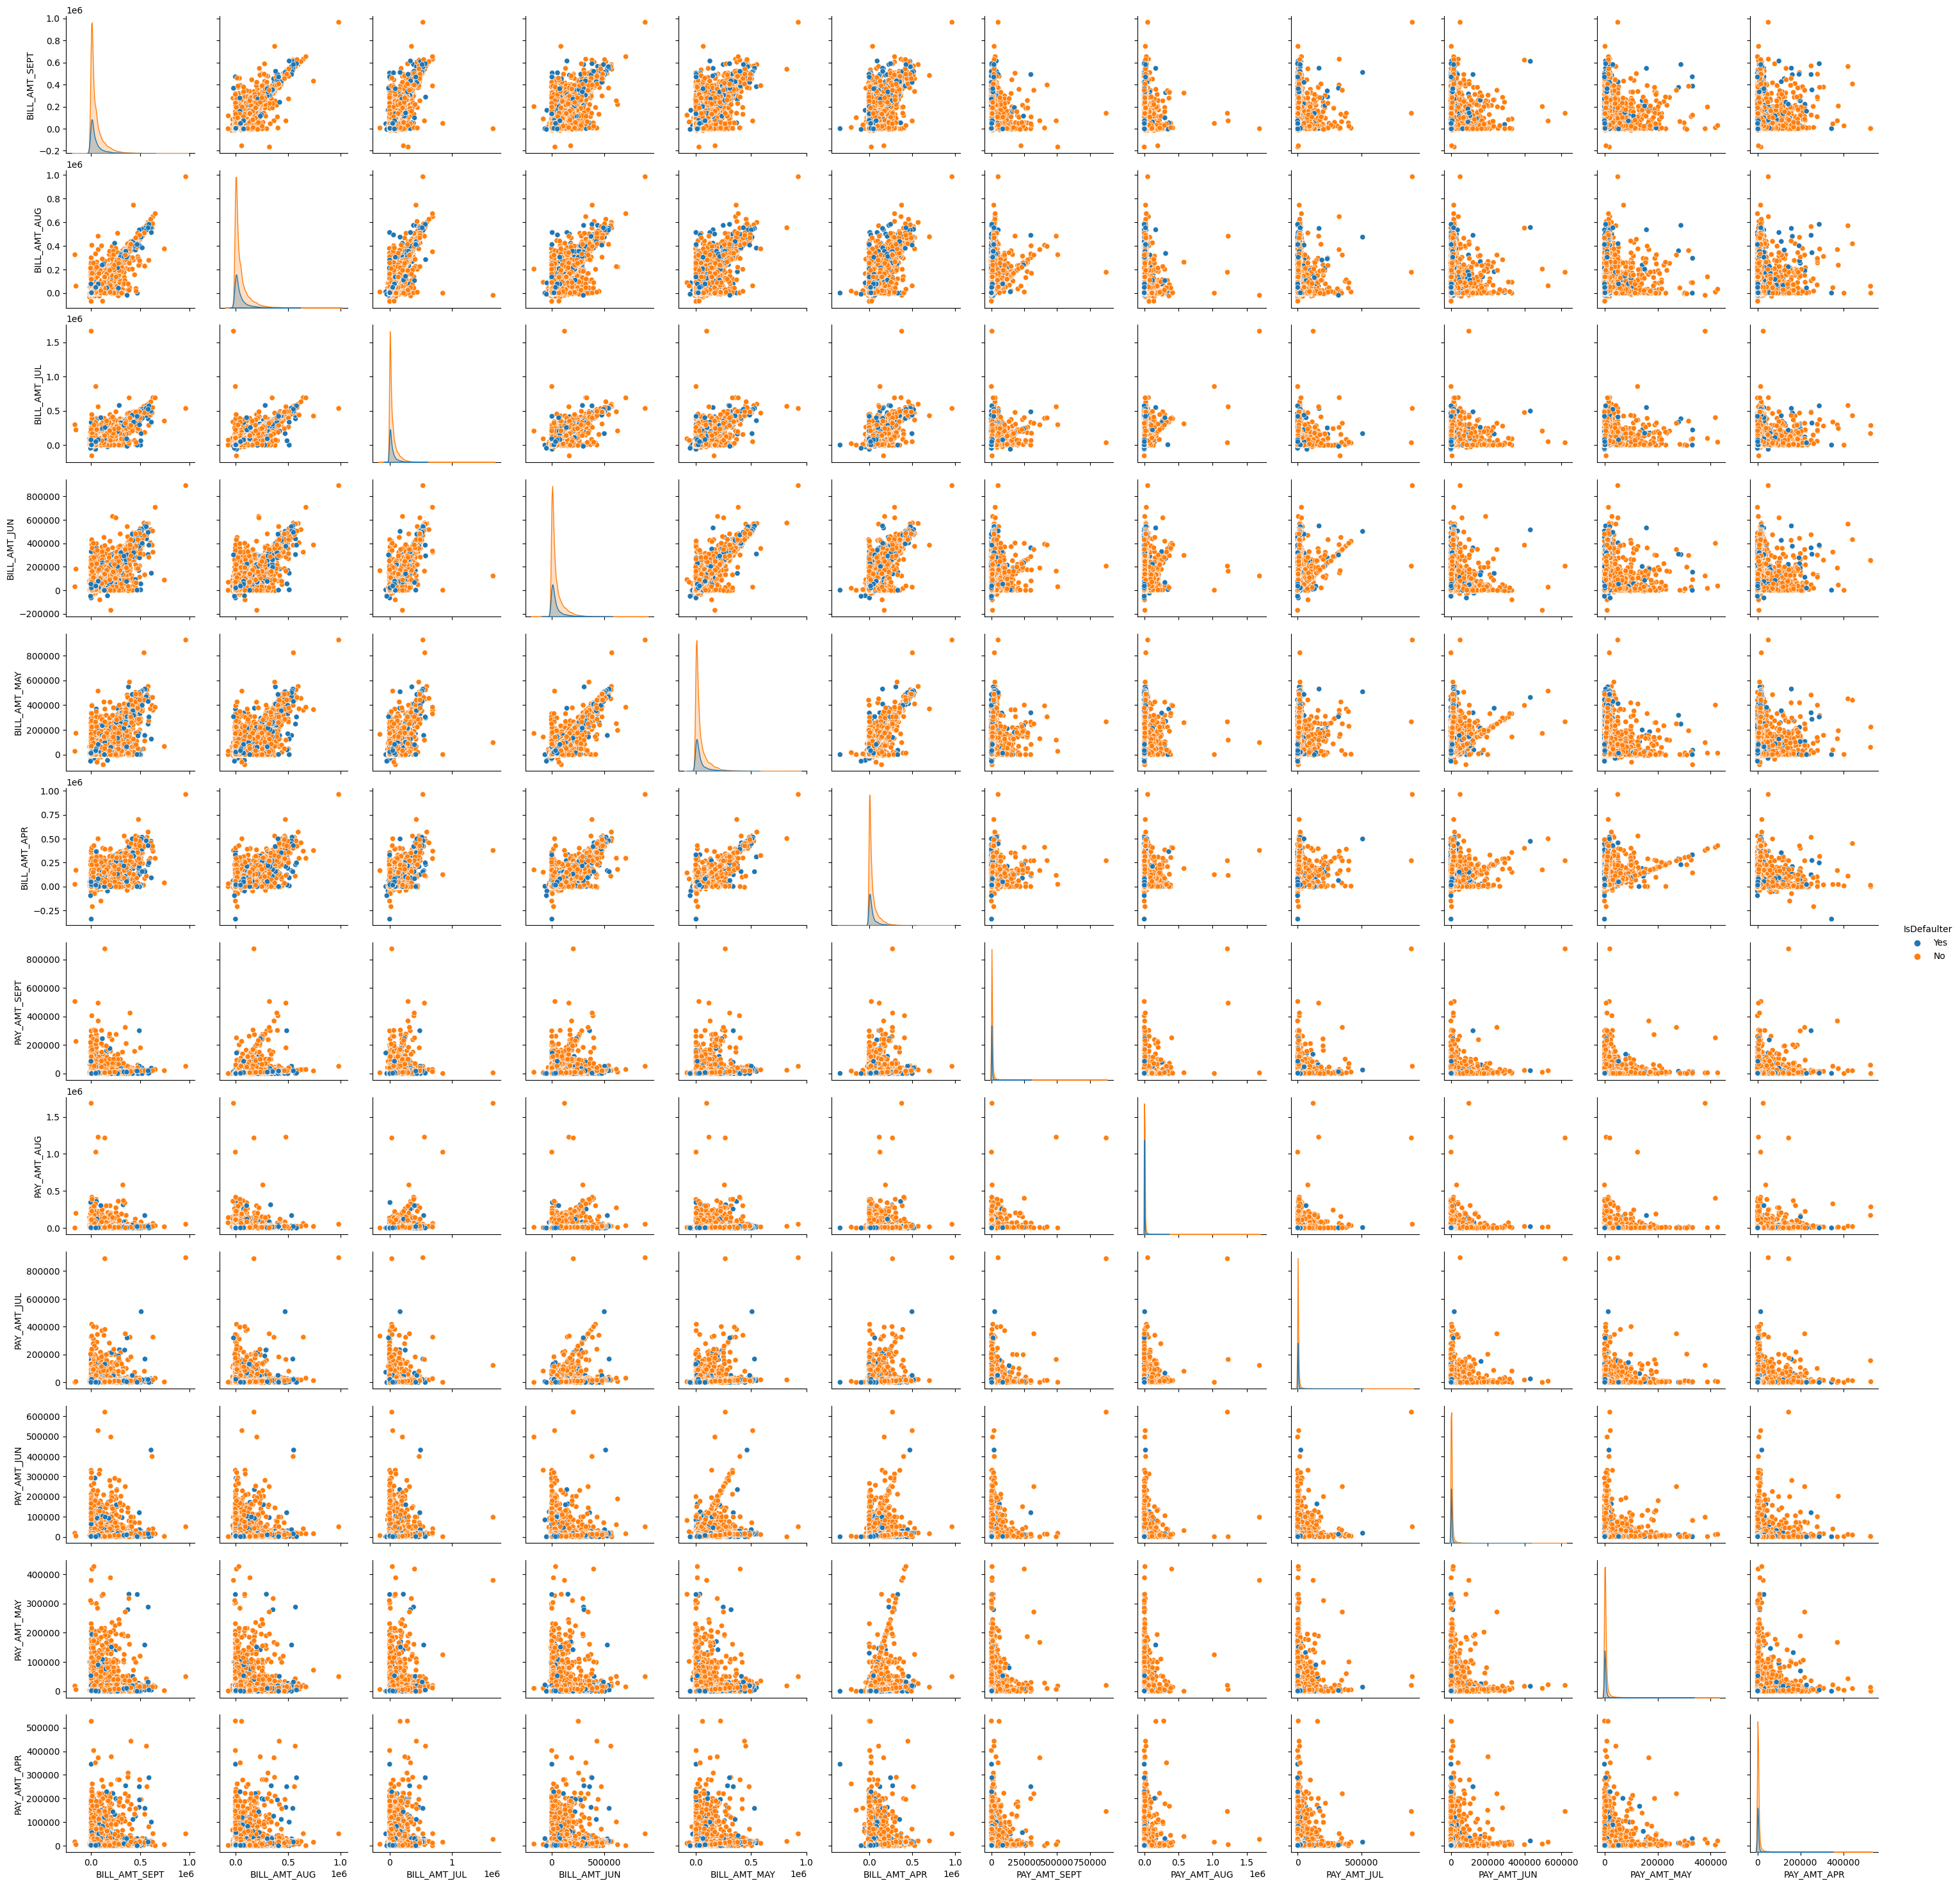

In [90]:
# Pair Plot visualization code
plt.figure(figsize=(20,40))
sns.pairplot(df_credit,vars=['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR','PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'], kind='scatter',hue= 'IsDefaulter')
plt.show()

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot depicts pairwise relationships between variables within a dataset. This offers a good visualisation and helps us grasp the material by condensing a big quantity of data into a single image. This is critical as we explore and become acquainted with our dataset.

##### 2. What is/are the insight(s) found from the chart?

We can see that the prior month's bill amount is linearly connected, implying that users spend a comparable amount each month. Higher billing amounts from prior months may be deafulters in the future.Where as payment amount is different each month.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### **Hypothetical Statement - 1**

**Married male defaults average age is 35 Years.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

   Null Hypothesis: N = 35

   Alternate Hypothesis : N != 35

   Test Type: Two Tailed Test

#### 2. Perform an appropriate statistical test.

In [91]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
sample_1=df_credit[(df_credit['MARRIAGE']=='Married')& (df_credit['SEX']=='Male')& (df_credit['IsDefaulter']=='Yes')].sample(1000)
# Getting the required parameter values for hypothesis testing
N= 35
sample_mean = sample_1['AGE'].mean()
size = len(sample_1)
# the standard deviation for population
std_pop = df_credit['AGE'].std()
Z_stat = ((sample_mean - N)/(std_pop/np.sqrt(N)))

#calculate the z value
z_value=norm.cdf(Z_stat,0,1)
#calculate p value
if z_value>0.5:
  P_value=2*(1-z_value)
else:
  P_value=2*z_value
print(f'P Value is {P_value} ')
if P_value>=0.05:
  print('Fail to reject the null hypothesis')
else:
  print('Reject the null hypothesis')

P Value is 6.929876217087738e-06 
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I utilised the Z-Test as a statistical test to produce P-Value and discovered that the null hypothesis was rejected and that married male customers defaulting do not have an average age of 35 years.

##### Why did you choose the specific statistical test?

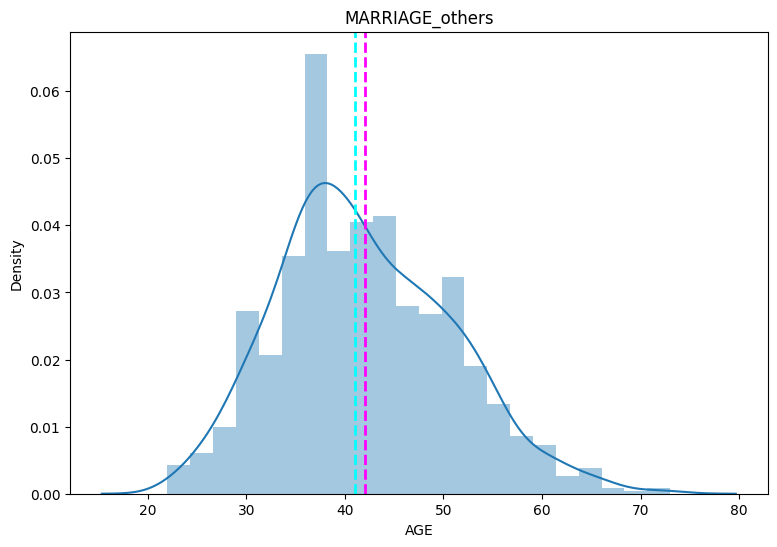

In [92]:
#Distrubution plot for Age feature
fig,ax=plt.subplots(1,1,figsize=(9,6))
feature= (sample_1["AGE"])
sns.distplot(sample_1["AGE"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [93]:
mean_median_difference=sample_1["AGE"].mean()- sample_1["AGE"].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  1.0050000000000026


As illustrated above, the mean median difference is between 1 and nearly zero. The mean is roughly the same as the median. As a result, it is a Normal Distribution. As a result, I used Z-Test directly.


### Hypothetical Statement - 2



####Customers defaulting have an average credit limit of 90000.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 90000

Alternate Hypothesise : mean !=90000

Type of Test : Two Tailed test

#### 2. Perform an appropriate statistical test.

In [94]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
sample_2=df_credit[(df_credit['IsDefaulter']=='Yes')].sample(1000)
# Getting the required parameter values for hypothesis testing
N= 90000
sample_mean = sample_2['LIMIT_BAL'].mean()
size = len(sample_2)
# calculate the t_statistic and p_value
t_statistic,P_value=stats.ttest_1samp(sample_2['LIMIT_BAL'],N)
print('T-Statistics value', t_statistic)
print("P-Value", P_value)
if P_value>=0.05:
  print('Fail to reject the null hypothesis')
else:
  print('Reject the null hypothesis')

T-Statistics value 10.590479988574856
P-Value 6.518194755458342e-25
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I utilised T-Test as a statistical test to generate P-Value and discovered that the null hypothesis was rejected since the customers that defaulted had not an average credit limit of 90000.


##### Why did you choose the specific statistical test?

In [95]:
mean_median_difference=sample_2['LIMIT_BAL'].mean()- sample_2['LIMIT_BAL'].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  37600.0


The accompanying figure shows that the median is bigger than the mean over ten. As a result, the distribution is positively biassed. Z-Test cannot be conducted on skewed data.

Even with strongly skewed data, t-tests and their related confidence intervals can and should be utilised in investigations with a large sample size.

So, with skewed data, we can utilise the T-test to get a better result. As a result, I used the t - test.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(HO):Defaulter does not depends on Educational qualification.

Alternate Hypothesis(Ha):Defaulter also get affected by Educational qualification.

#### 2. Perform an appropriate statistical test.

In [96]:
#Creating Contigency table of EDUCATION AND DEFAULT PAYMENT NEXT MONTH
cont_table=pd.crosstab(df_credit['IsDefaulter'], df_credit['EDUCATION'], margins=False)
#Using Chi-square test to validate Null/Alternate Hypothesis
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, P_value, dof, expected = chi2_contingency(cont_table)
print("P-Value", P_value)
if P_value>=0.05:
  print('Fail to reject the null hypothesis')
else:
  print('Reject the null hypothesis')

P-Value 1.495064564810615e-34
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I used chi-square test to generate P_value and discoverd null hypothesis was rejected since defaulter does not depend on educational qualification.


##### Why did you choose the specific statistical test?

Here we have to test difference between  defaulter and non defaulter with educational qualification.The Chi-Square test is a statistical procedure for determining the difference between observed and expected data.

## ***6. Feature Engineering & Data Pre-processing***

In [97]:
#copy the original data before applying feature engineering
df=df_credit.copy()

### 1. Handling Missing Values

In [98]:
# Handling Missing Values & Missing Value Imputation

df.isnull().sum()

LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
IsDefaulter      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing value in the dataset to handle.

### 2. Handling Outliers

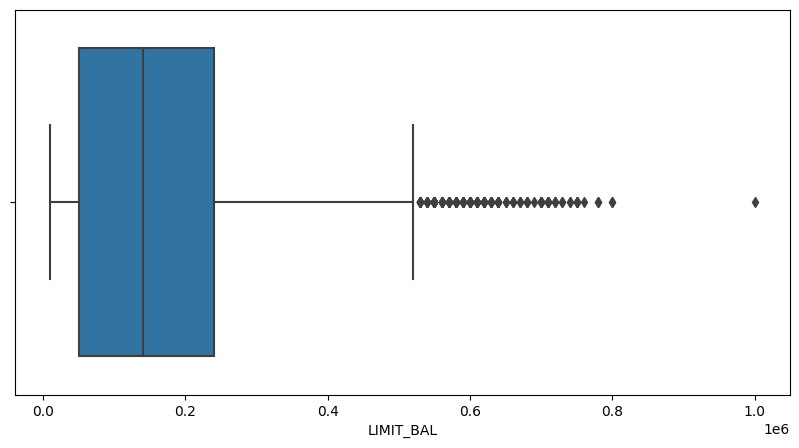

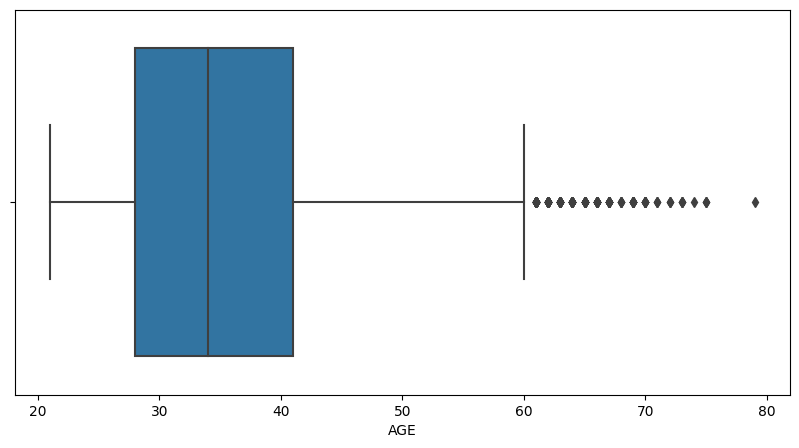

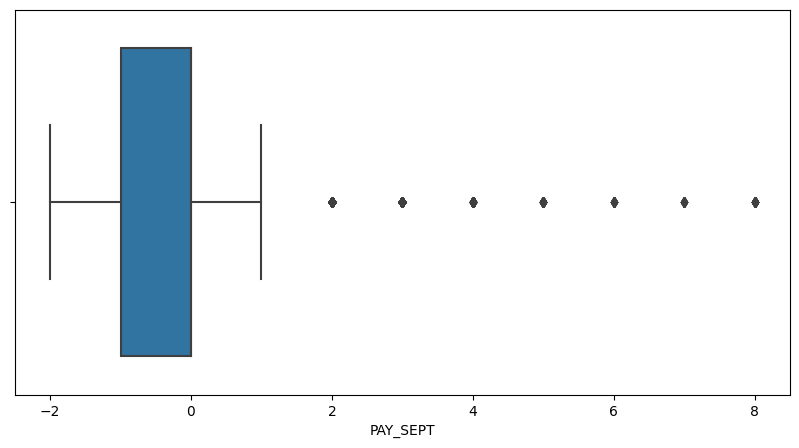

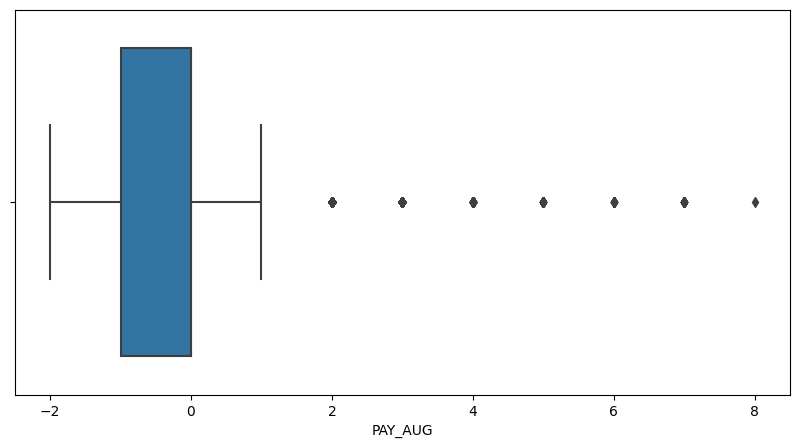

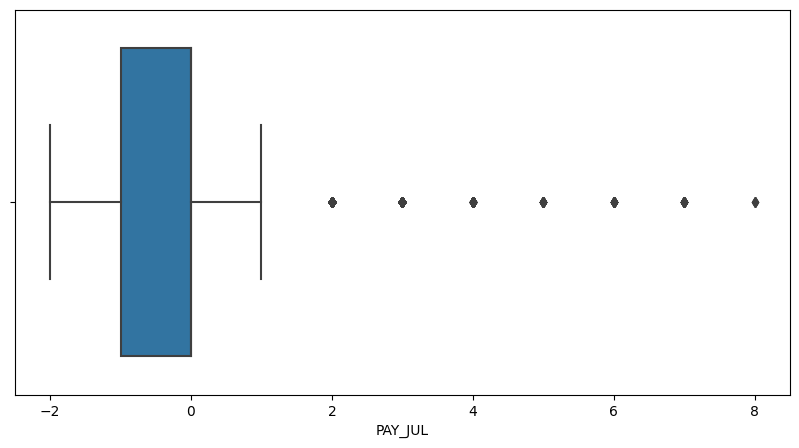

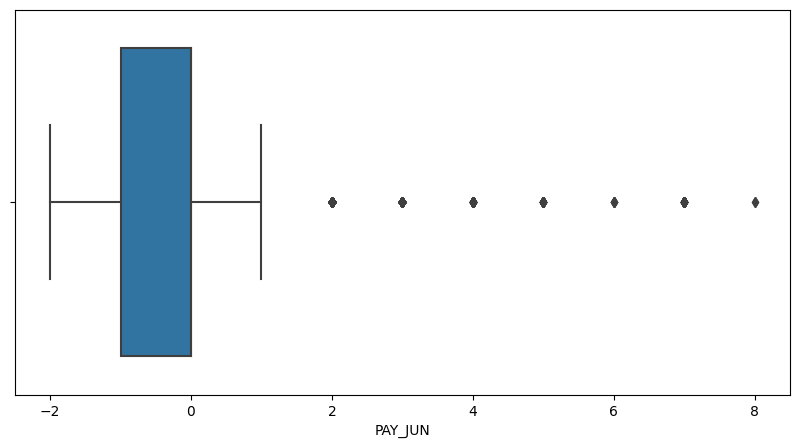

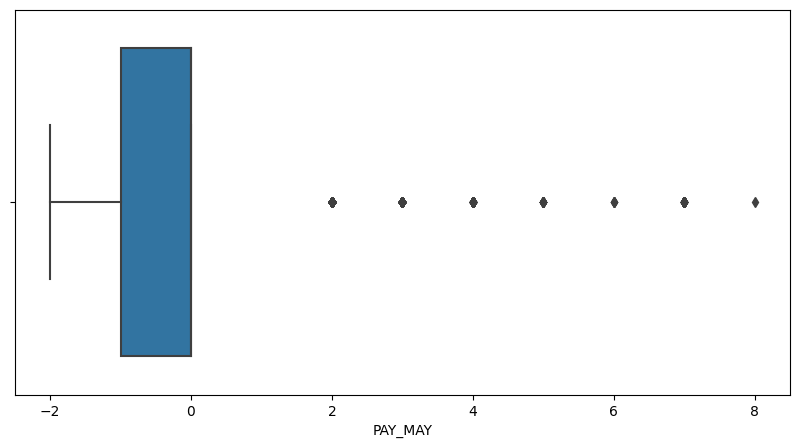

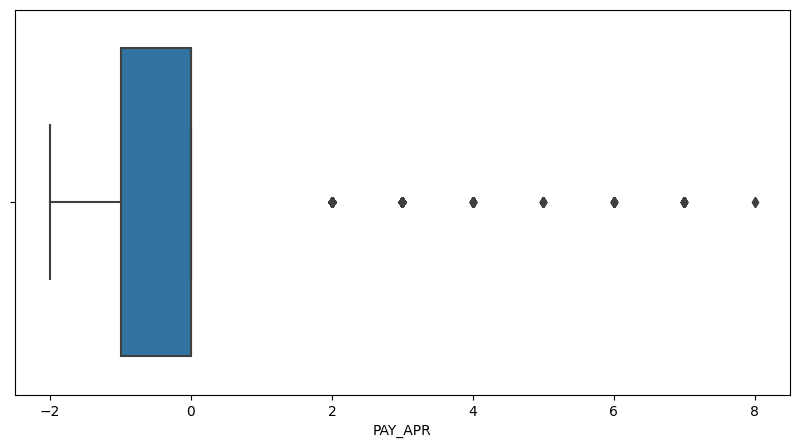

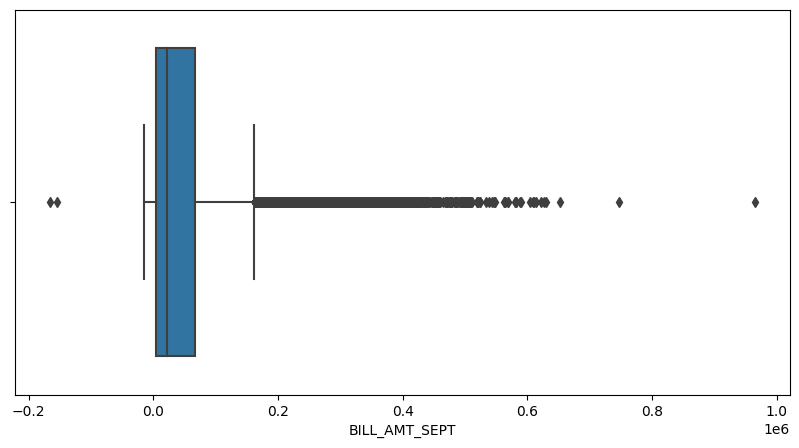

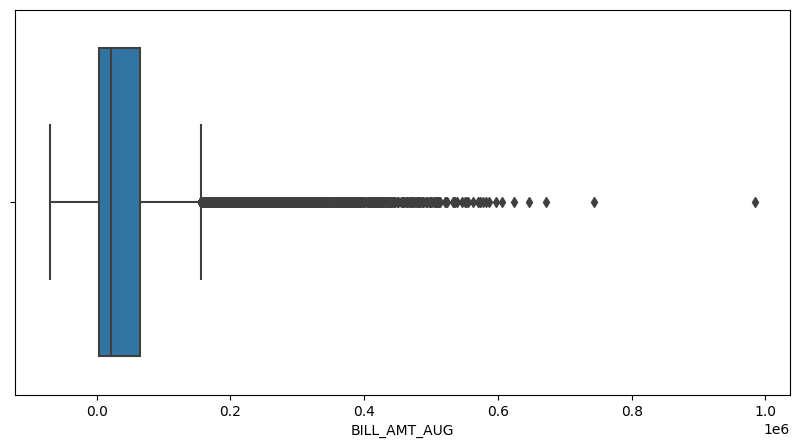

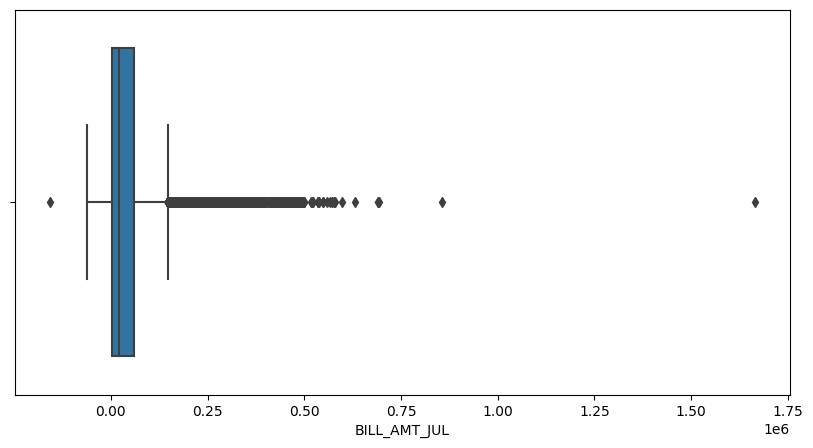

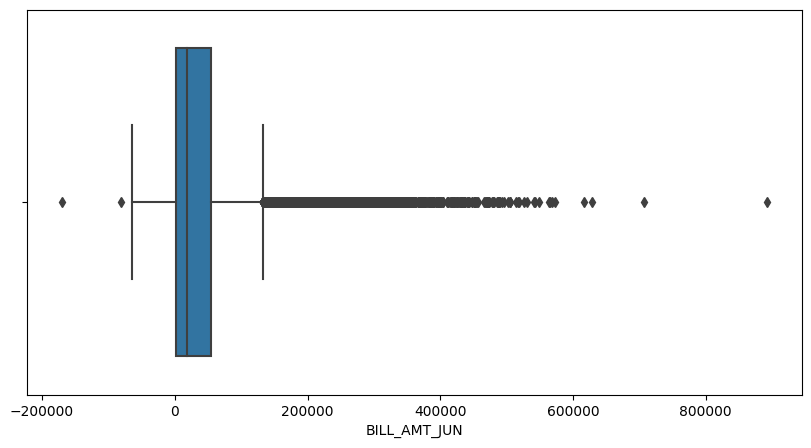

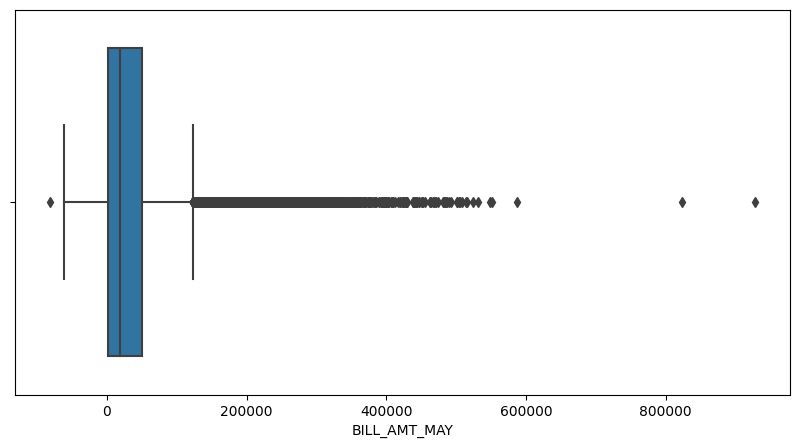

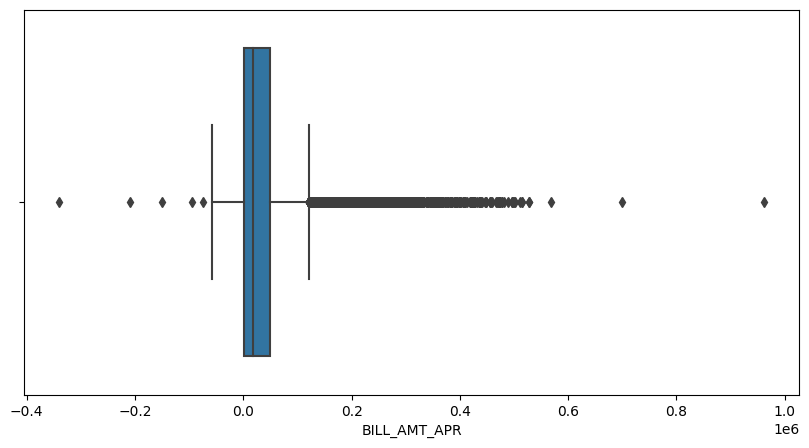

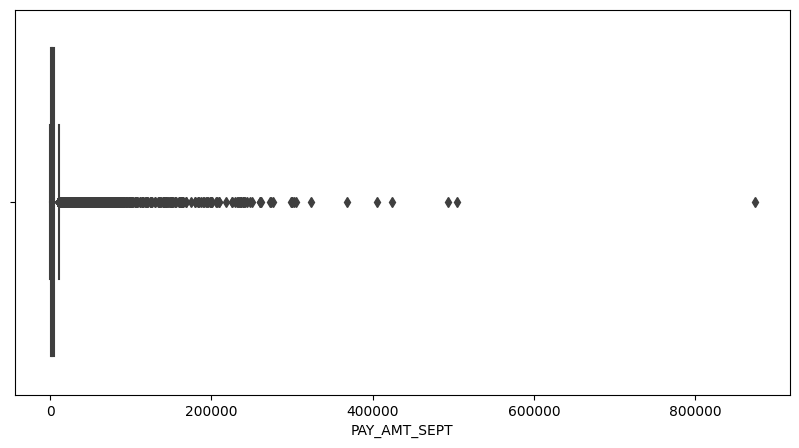

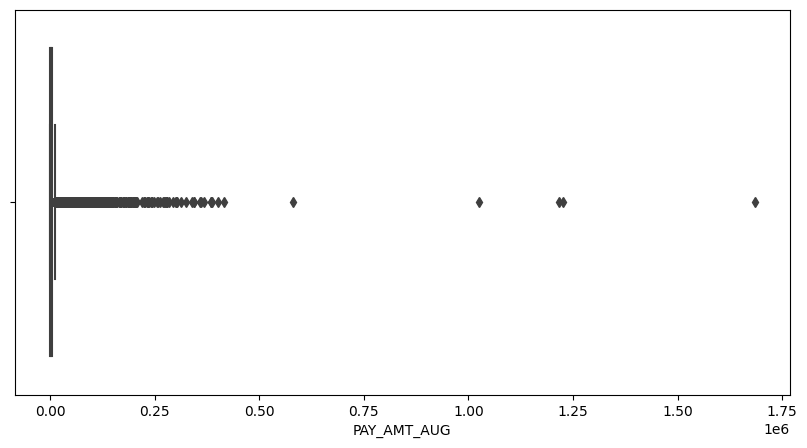

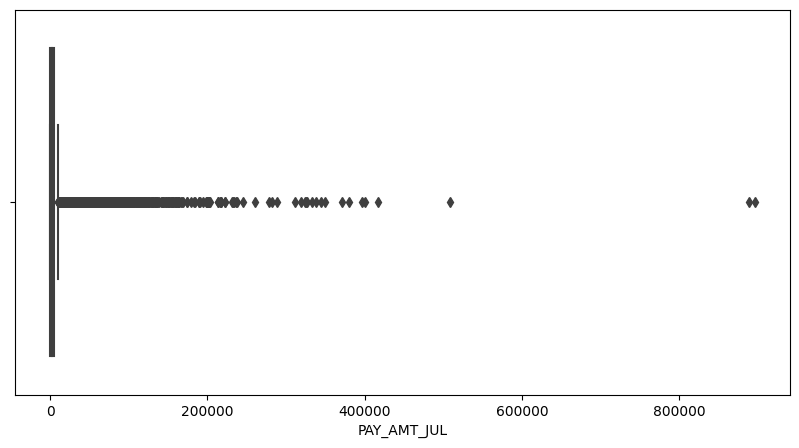

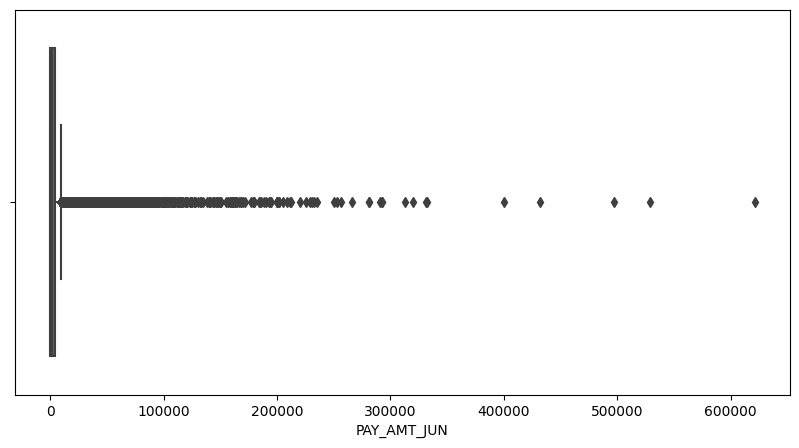

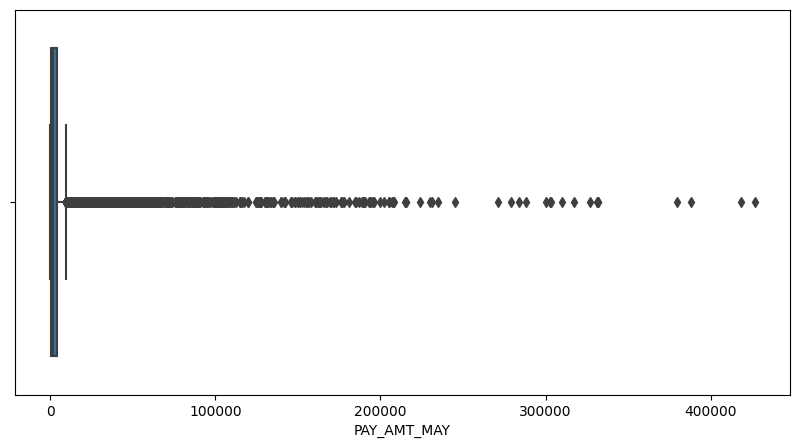

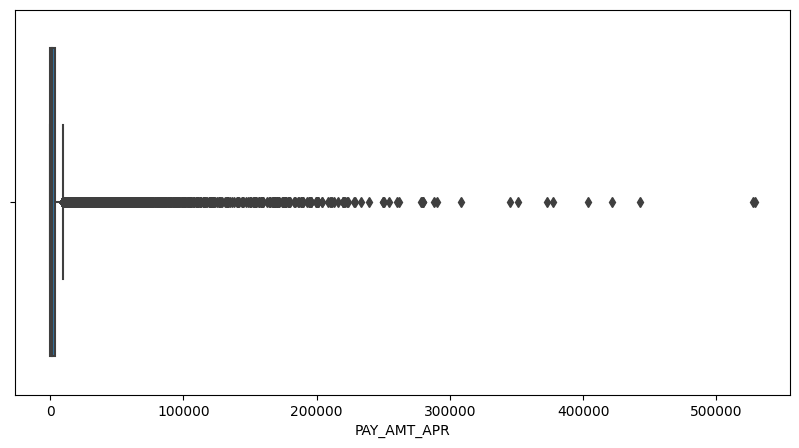

In [99]:
# Handling Outliers & Outlier treatments
#Checking outliers in dataset using Boxplot
for col in df.describe().columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the boxplot to look for outliers in the dataset. Some points appear to be outliers in numeric features that are primarily connected to quantity, and we can use the IQR method to treat these outliers without knowing the exact limit of these columns from the bank, and addressing these outlying amounts will result in data loss.And there is a potential that the amount that was maximal and appeared to be an outlier was the true value for that characteristic, thus I did not employ any approaches to treat these outlying numbers.


### 3. Categorical Encoding

In [100]:
#make the dependable column categorical to binary
df.replace({'IsDefaulter' : {'Yes' : 1, 'No' : 0}}, inplace = True)

In [101]:
# check how many colmun contain categorical data
sum(df.dtypes==object)

3

In [102]:
#Creating Dummies
df=pd.get_dummies(df)

In [103]:
df.head()

LIMIT_BAL  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0      20000   24         2        2       -1       -1       -2       -2   
1     120000   26        -1        2        0        0        0        2   
2      90000   34         0        0        0        0        0        0   
3      50000   37         0        0        0        0        0        0   
4      50000   57        -1        0       -1        0        0        0   

   BILL_AMT_SEPT  BILL_AMT_AUG  ...  IsDefaulter  SEX_Female  SEX_Male  \
0           3913          3102  ...            1           1         0   
1           2682          1725  ...            1           1         0   
2          29239         14027  ...            0           1         0   
3          46990         48233  ...            0           1         0   
4           8617          5670  ...            0           0         1   

   EDUCATION_Graduate School  EDUCATION_High School  EDUCATION_University  \
0                          0                      0                     1   
1                          0                      0                     1   
2                          0                      0                     1   
3                          0                      0                     1   
4                          0                      0                     1   

   EDUCATION_others  MARRIAGE_Married  MARRIAGE_Single  MARRIAGE_others  
0                 0                 1                0                0  
1                 0                 0                1                0  
2                 0                 0                1                0  
3                 0                 1                0                0  
4                 0                 1                0                0  

[5 rows x 30 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-shot encoding is a critical step in preparing your dataset for machine learning. Your categorical data is converted to a binary vector representation via one-shot encoding. Pandas get dummies makes this really simple.
This is critical for working with many machine learning algorithms that accept only numerical inputs, such as decision trees and support vector machines.
This indicates that a new column is formed for each unique value in a column. Depending on whether the value matches the column header, the values in this column are represented as 1s or 0s.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [104]:
# Expand Contraction

#### 2. Lower Casing

In [105]:
# Lower Casing

#### 3. Removing Punctuations

In [106]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [107]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [108]:
# Remove Stopwords

In [109]:
# Remove White spaces

#### 6. Rephrase Text

In [110]:
# Rephrase Text

#### 7. Tokenization

In [111]:
# Tokenization

#### 8. Text Normalization

In [112]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [113]:
# POS Taging

#### 10. Text Vectorization

In [114]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

There is no need for feature manipulation or feature selection because only previous month's payment status and previous month's bill amount have a high correlation and cannot be dropped or manipulated because they are the most significant parameters of detect defaulter.

In [115]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [116]:
#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

    return(vif)

In [117]:
#check multicolinearuty
calc_vif(df[[i for i in df.describe().columns if i not in ['IsDefaulter','MARRIAGE_others','EDUCATION_High School','SEX_Male'	,'SEX_Female','EDUCATION_University','EDUCATION_others','MARRIAGE_Married','MARRIAGE_Single','EDUCATION_Graduate School']]]).sort_values(by='VIF',ascending=False)

variables    VIF
9    BILL_AMT_AUG  38.21
12   BILL_AMT_MAY  35.98
10   BILL_AMT_JUL  31.78
11   BILL_AMT_JUN  29.55
13   BILL_AMT_APR  21.42
8   BILL_AMT_SEPT  20.80
6         PAY_MAY   4.98
5         PAY_JUN   4.44
0       LIMIT_BAL   3.84
4         PAY_JUL   3.73
7         PAY_APR   3.46
3         PAY_AUG   3.21
1             AGE   2.84
15    PAY_AMT_AUG   2.38
2        PAY_SEPT   1.92
14   PAY_AMT_SEPT   1.91
16    PAY_AMT_JUL   1.91
18    PAY_AMT_MAY   1.85
17    PAY_AMT_JUN   1.80
19    PAY_AMT_APR   1.27

In [118]:
#drooping sex_female column
df.drop(['SEX_Female'],axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

The Variance Inflation Factor (VIF) is used to detect multicollinearity. Variance inflation factors (VIF) quantify how much the variance of predicted regression coefficients is inflated when the predictor variables are not linearly connected.

##### Which all features you found important and why?

Even though the vif value of a few columns is larger than 10, we select all features since those columns are the most critical features and we cannot afford to lose them.Onle SEX_Female column we have dropped because it is unnecessary of keeping two same binary column.

### 5. Data Transformation

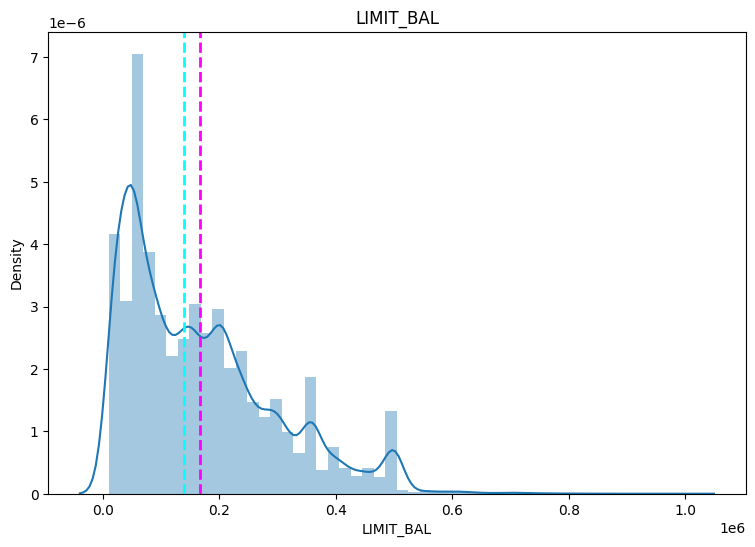

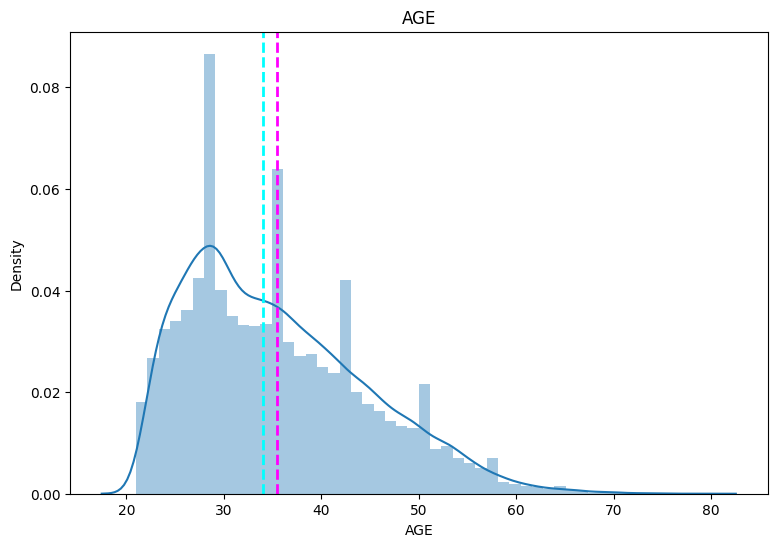

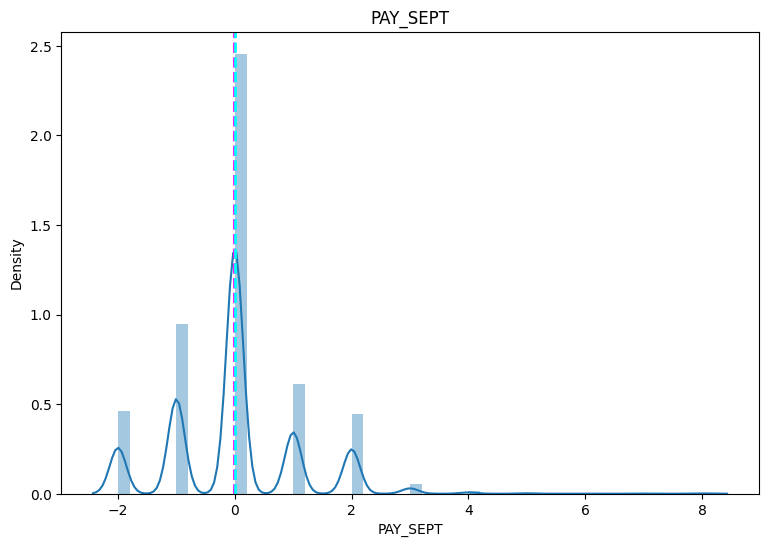

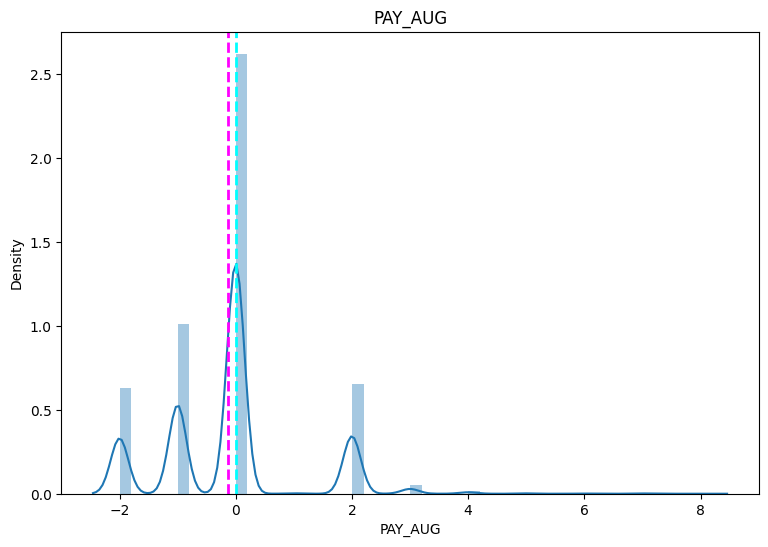

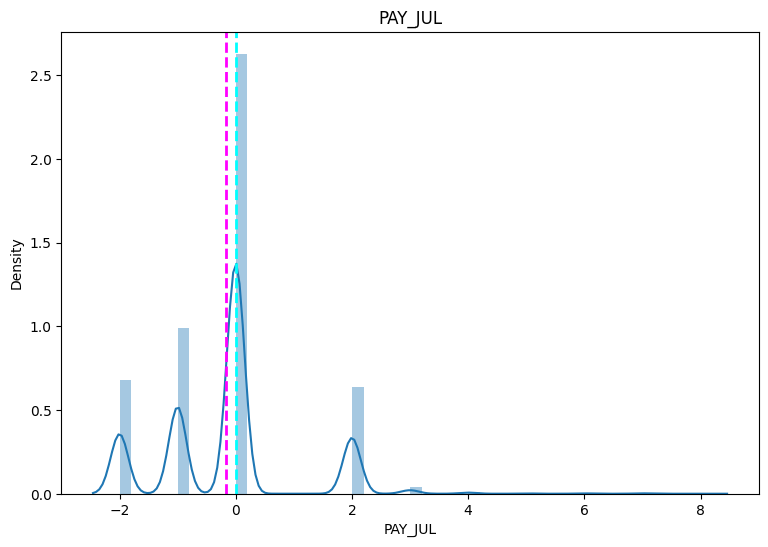

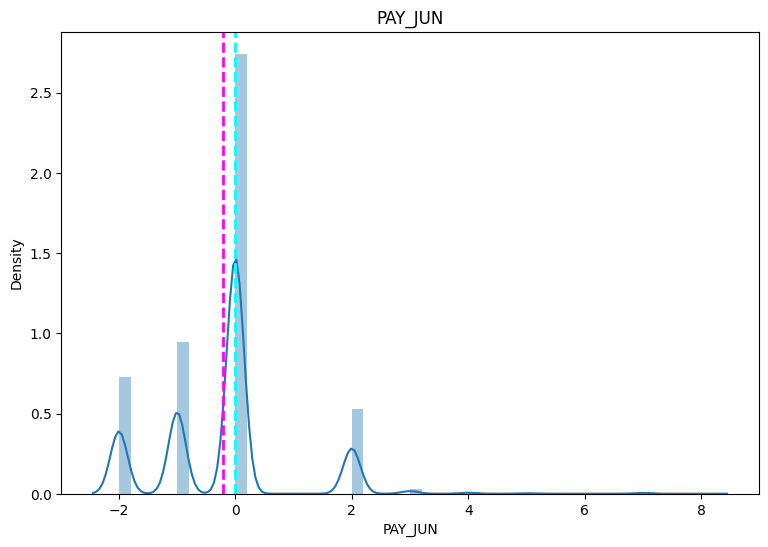

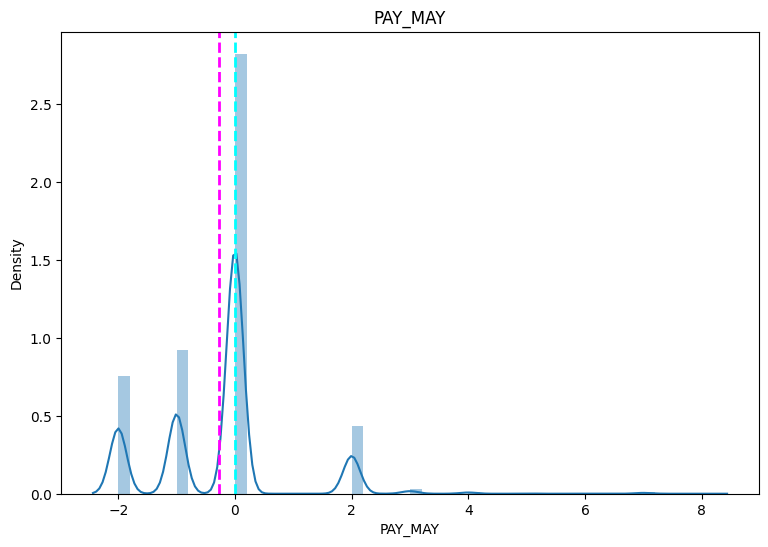

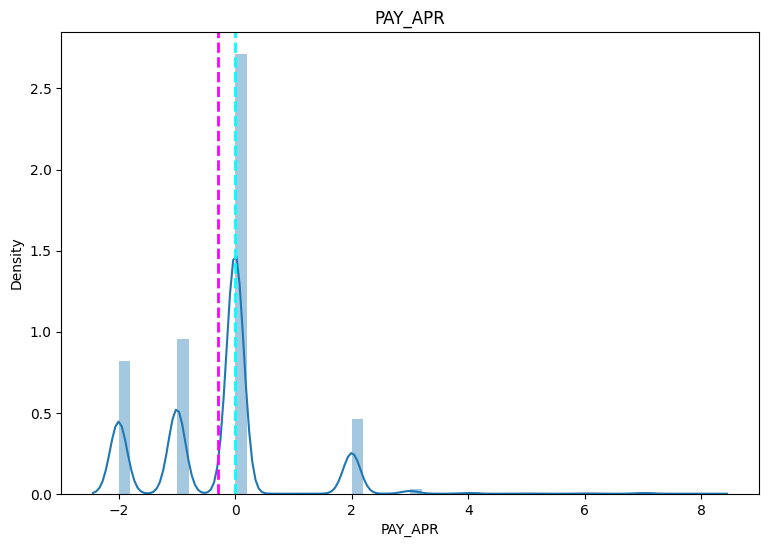

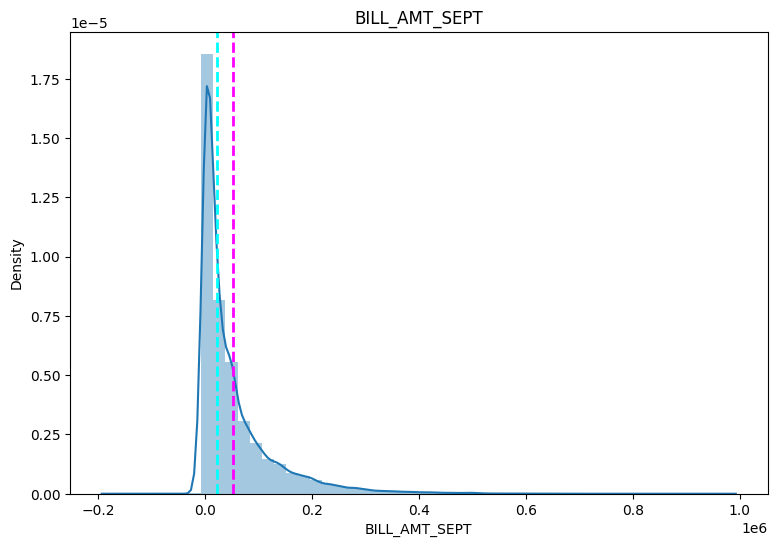

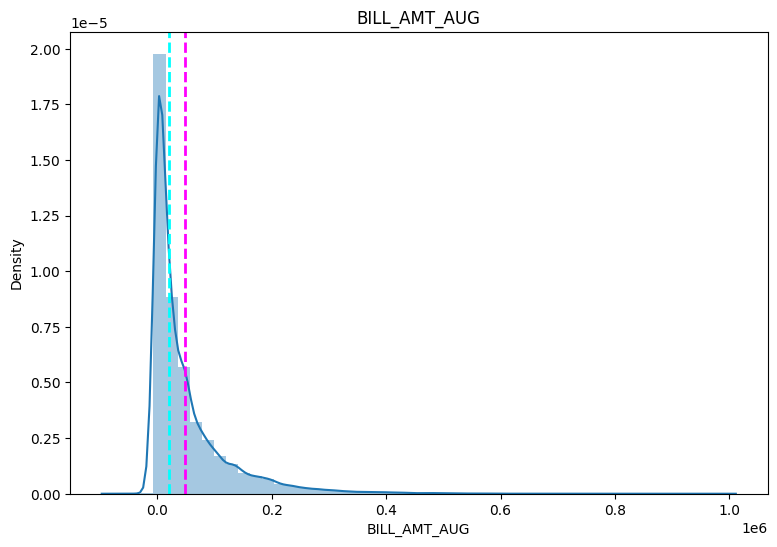

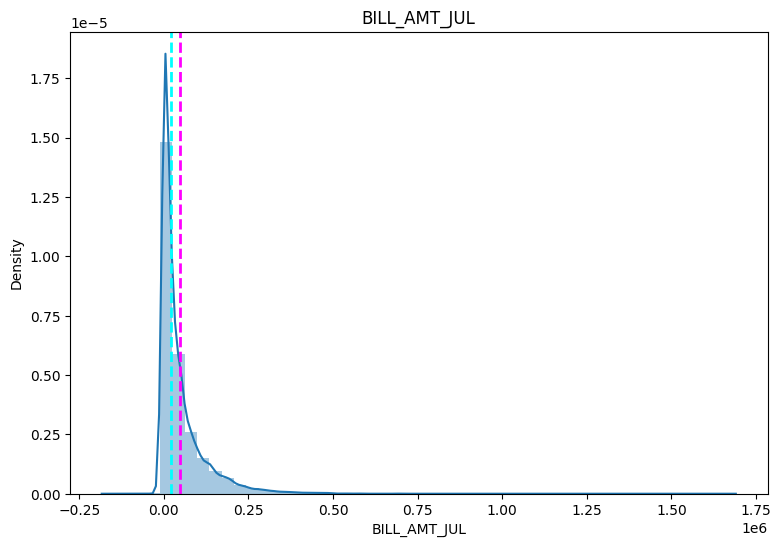

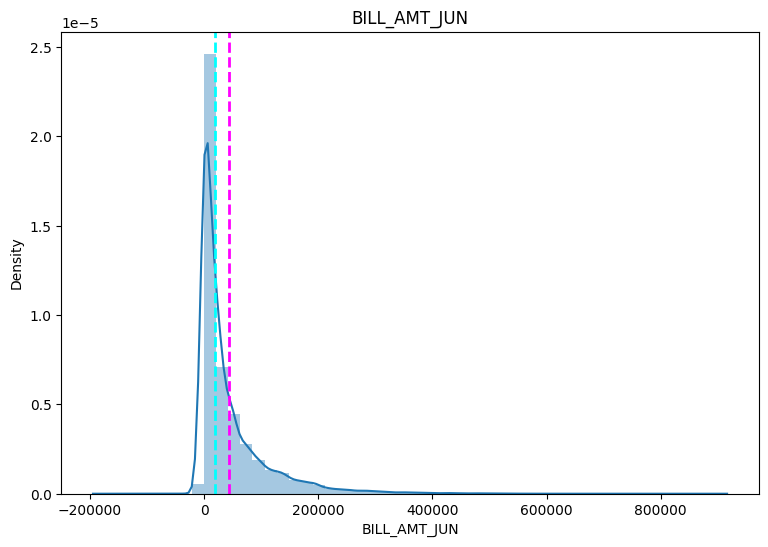

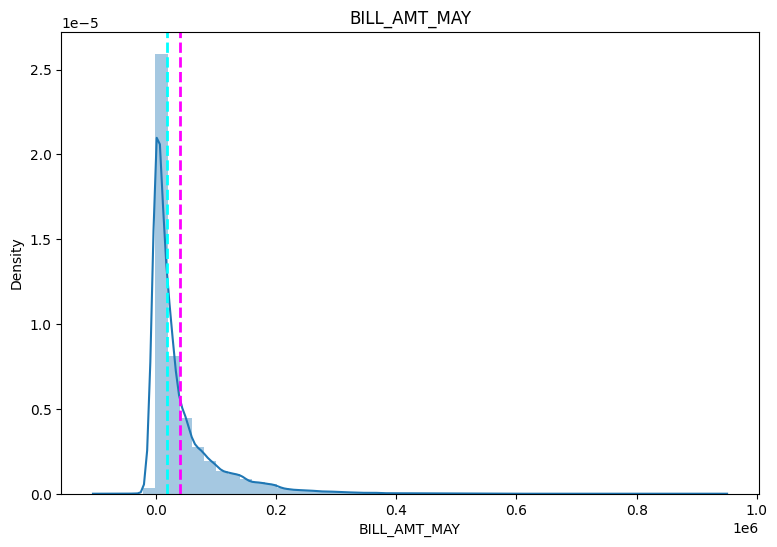

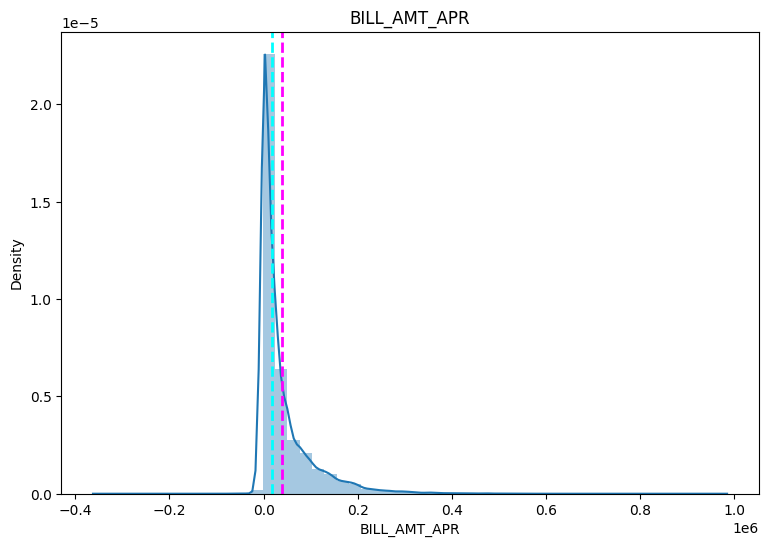

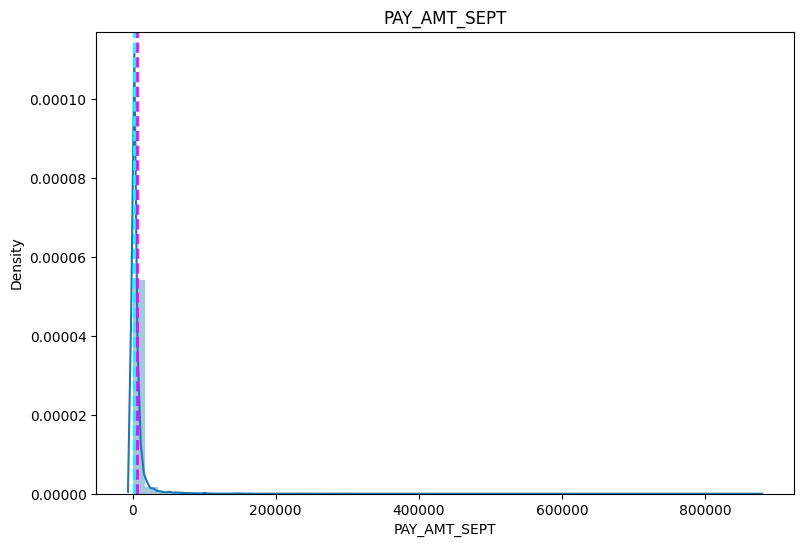

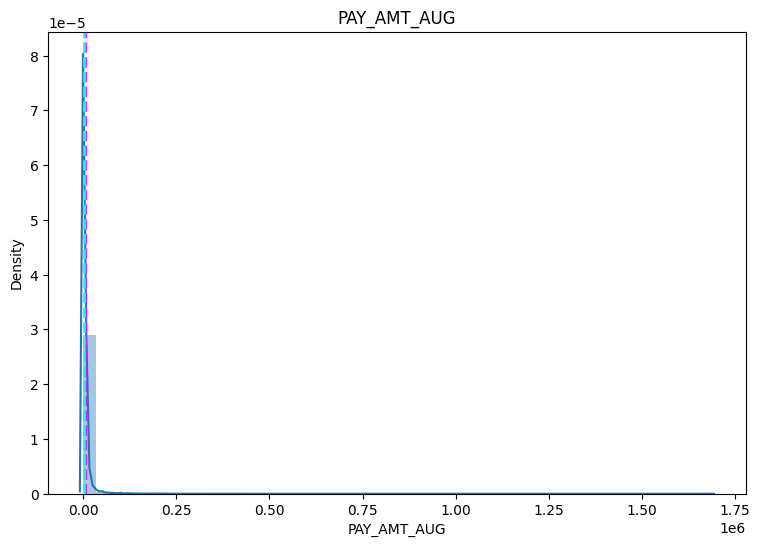

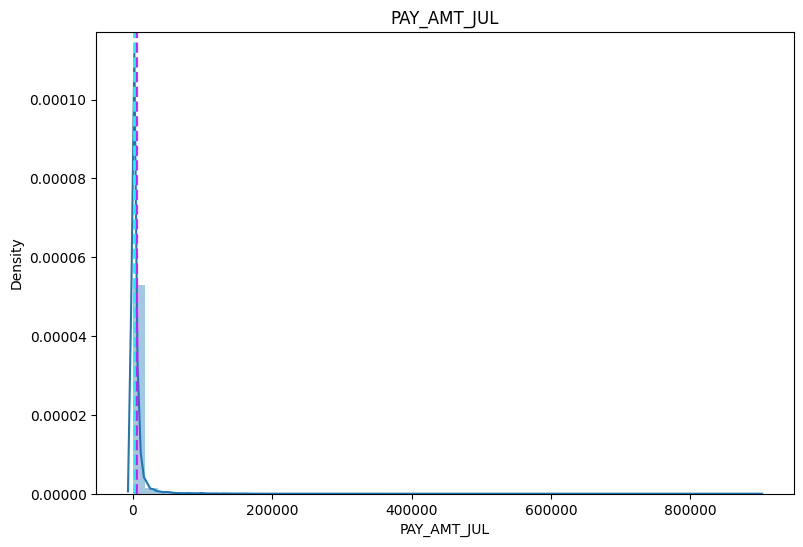

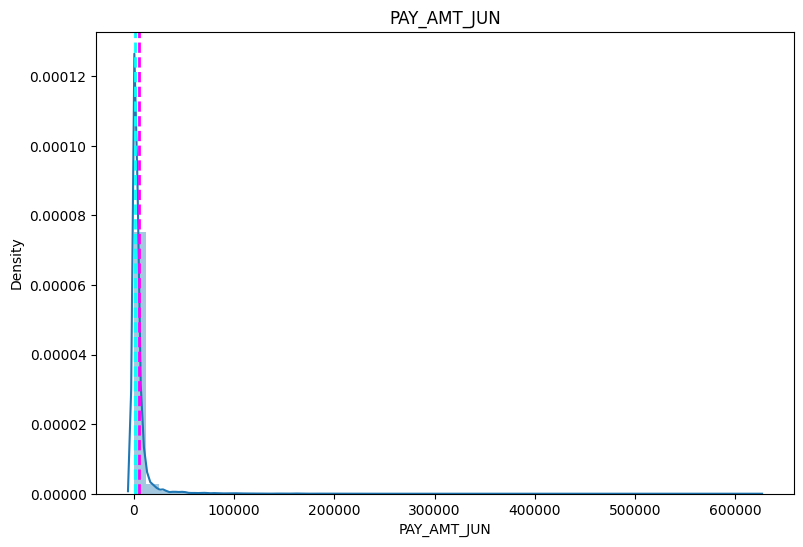

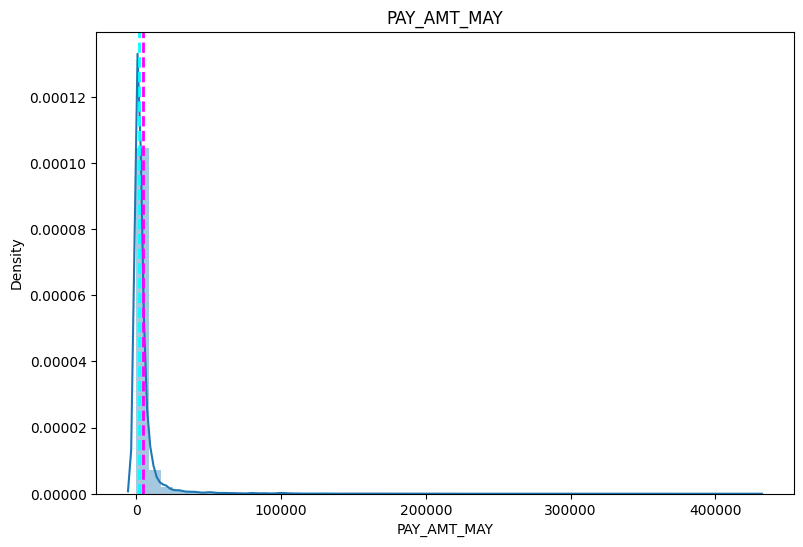

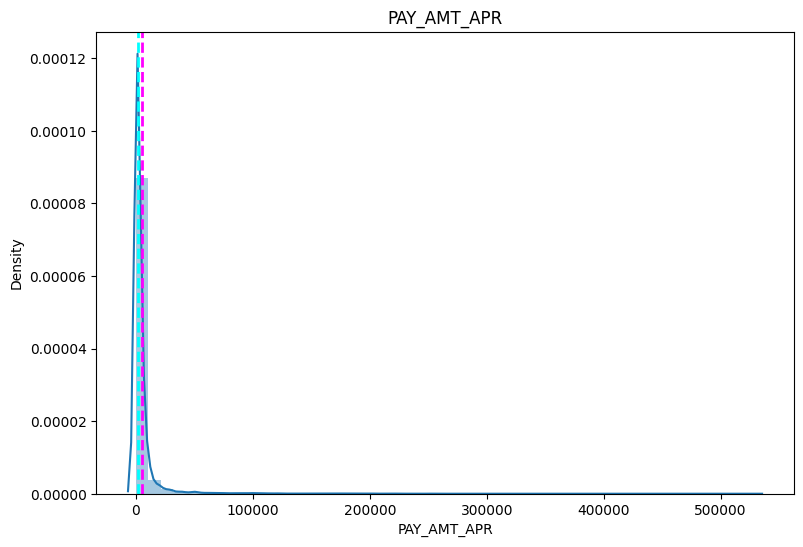

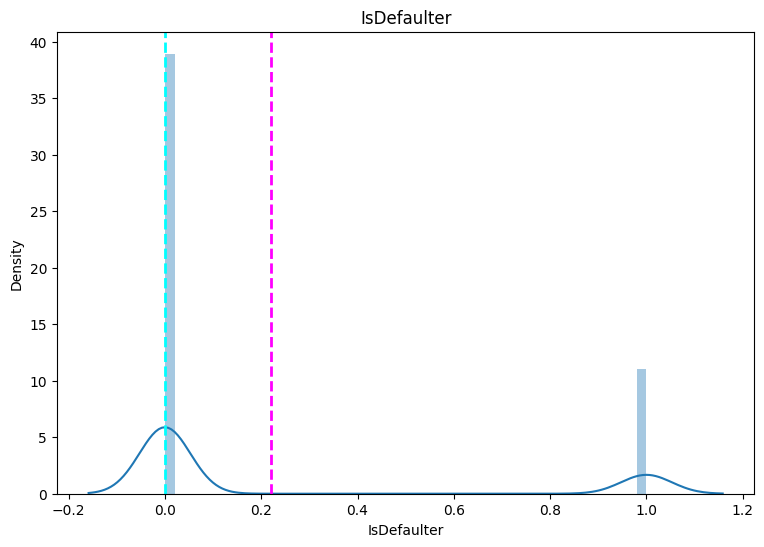

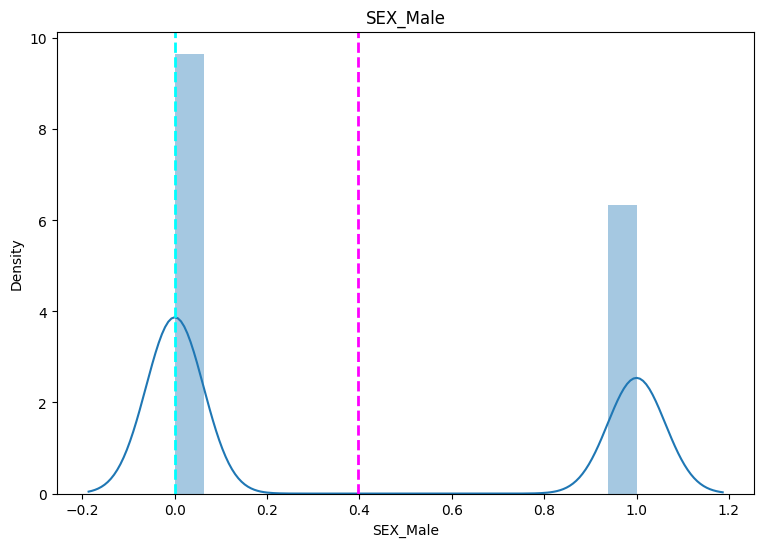

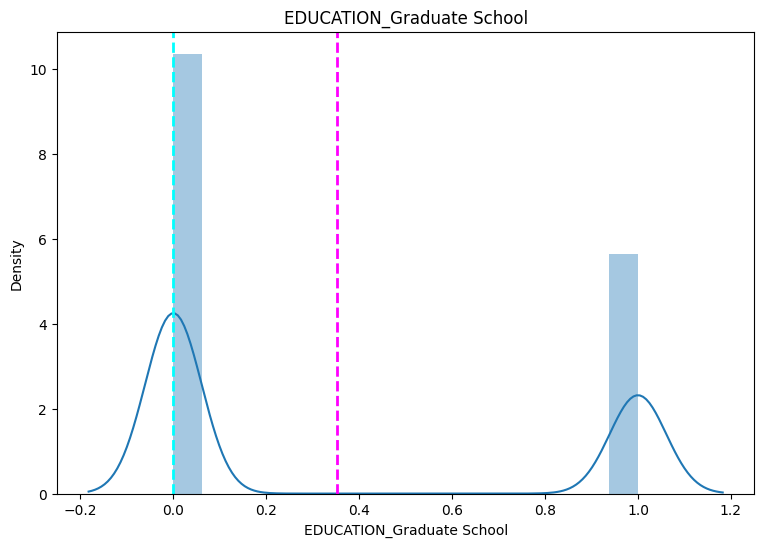

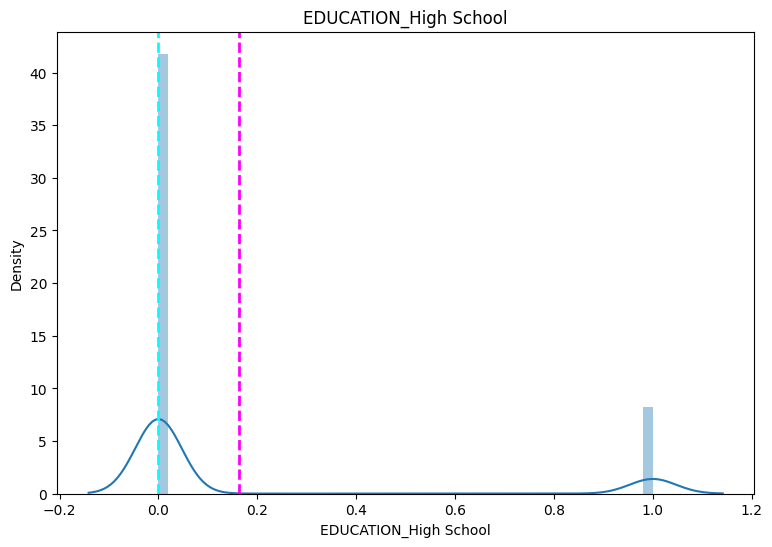

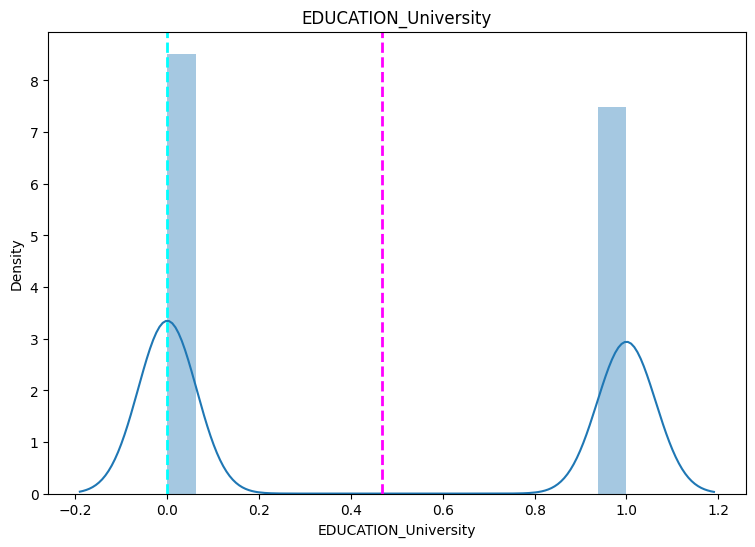

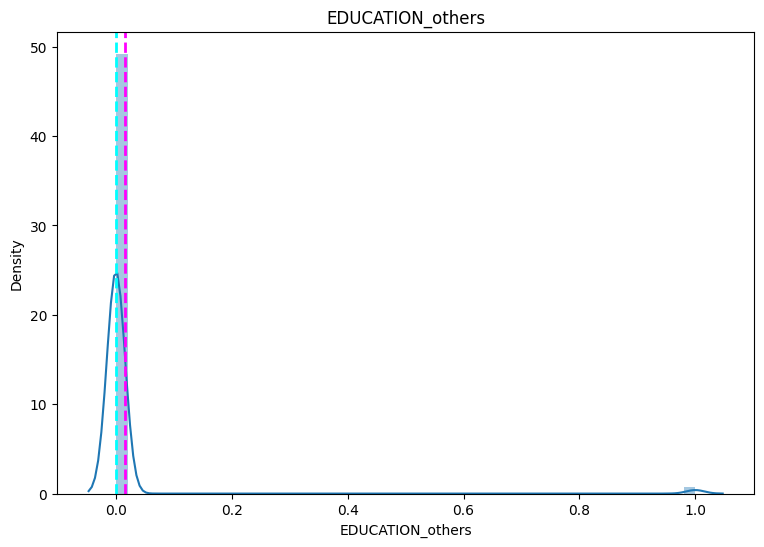

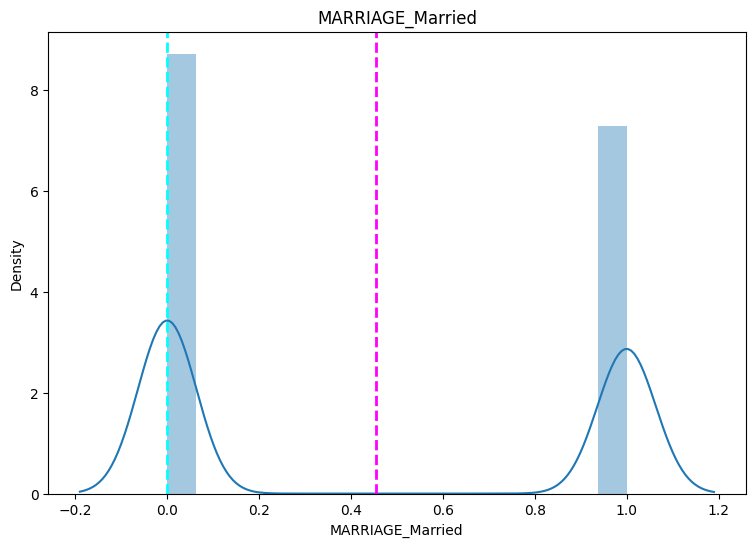

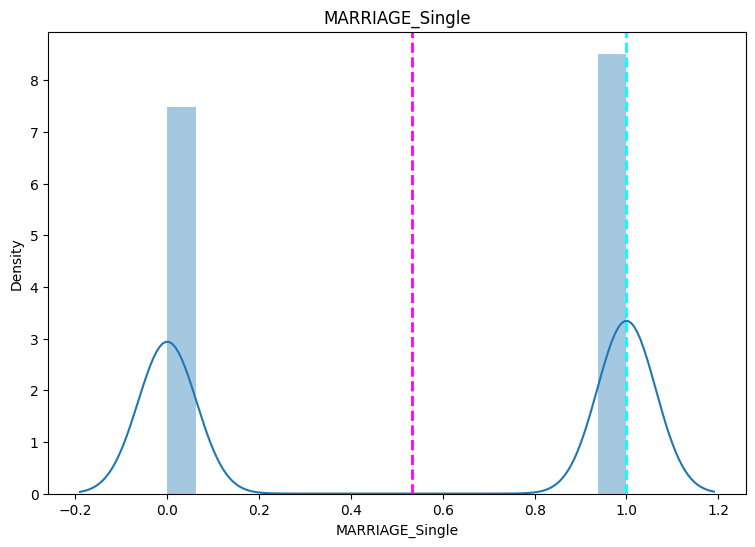

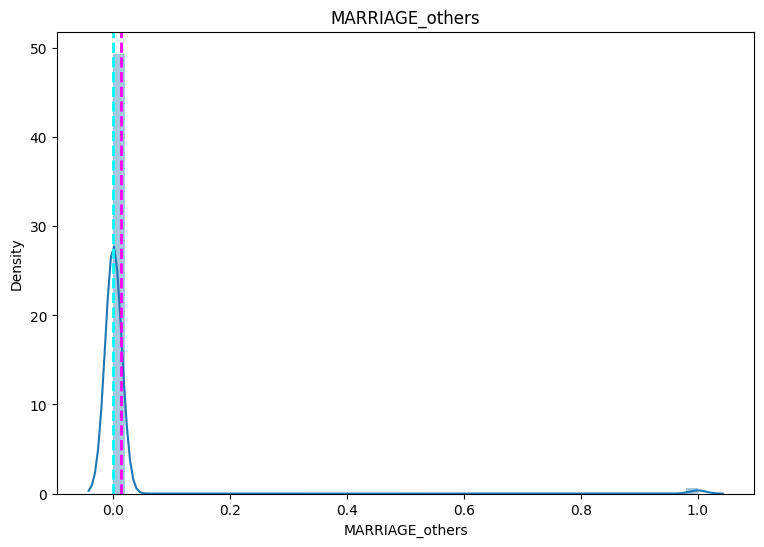

In [119]:
#check distribution  of all independent features
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

There is no need to transformed any features.

In [120]:
# Transform Your data

### 6. Dimesionality Reduction

No there is no need for dimensionality reduction in our dataset.

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [121]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

In [122]:
#split dependent and indipendent variable
y=df['IsDefaulter']
X=df.drop(['IsDefaulter'],axis=1)

##### Do you think the dataset is imbalanced? Explain Why.

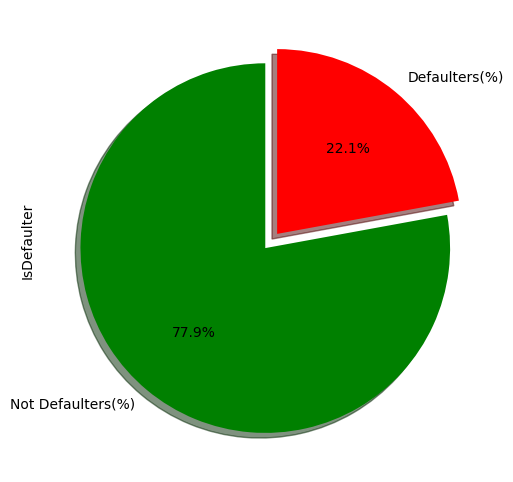

In [123]:
#Visualisation of class imbalance
y.value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulters(%)','Defaulters(%)'],
                               colors=['green','red'],
                               explode=[.05,.05]
                              )
plt.show()

As we can see, 77.9% of the data belongs to the Not defaulters category, while only 22.1% belongs to the Defaulters category, implying that our dataset is unbalanced.

In a dataset with highly imbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis and will have a high accuracy rate, despite the fact that it is plainly not the correct one.

The balanced data would imply that each class would receive 50% of the available points. Little imbalance is not a concern for most machine learning techniques. So, if one class has 60% of the points and the other has 40%, there should be no noticeable performance reduction. Only when the class imbalance is extreme, such as 90% for one class and 10% for the other, would typical optimisation criteria or performance metrics be ineffective and require adjustment.



In [124]:
# Handling Imbalanced Dataset (If needed)
# importing SMOTE
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', y.value_counts())
smt = SMOTE(random_state=40)

# fit predictor and target variable
X_smt, y_smt = smt.fit_resample(X,y)

print('\nDataset After:\n',y_smt.value_counts())

Dataset Before:
 0    23364
1     6636
Name: IsDefaulter, dtype: int64

Dataset After:
 1    23364
0    23364
Name: IsDefaulter, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling technique) was employed to balance the dataset.

SMOTE is a machine learning technique for coping with problems that arise while working with an imbalanced data collection. In practise, imbalanced data sets are common, and most ML algorithms are vulnerable to them, so we must improve their performance by employing approaches such as SMOTE.

The SMOTE algorithm operates in four simple steps:

1)Select a minority group as the input vector.

2)Determine its k nearest neighbours (k_neighbors is an input to the SMOTE() method).

3)Select one of these neighbours and draw a synthetic point somewhere on the line connecting the point under consideration and its selected neighbour.

4)Repeat the process until the data is balanced.



### 7. Data Splitting

In [125]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,test_size=0.2,random_state=0)

In [126]:
#Checking the shape of
print(X_train.shape,y_train.shape)
# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(37382, 28) (37382,)
(9346, 28) (9346,)


##### What data splitting ratio have you used and why?

I used an 80:20 split for the train-test split. We can see that we have 37382 data for training and 9346 data for testing, which is a reasonable split to begin with because we have kept a substantial amount of data for training our model.




### 8. Data Scaling

In [127]:
# Scaling your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I chose Standard Scaler to scale my data since it adjusts the data so that the mean is 0 and the standard deviation is 1. In a nutshell, it standardises data. Standardisation is beneficial for data with negative values. The data is arranged in a conventional normal distribution. It's better for classification than regression.




## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression

In [128]:
# ML Model - 1 Implementation
model_lr=LogisticRegression(fit_intercept=True,max_iter=1000)

# Fit the Algorithm
model_lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [129]:
#Cheking model coefficient
print("The Coefficients obtain from logisticregression model",model_lr.coef_)
# Checking the intercept value
print("The Coefficients obtain from logisticregression model",model_lr.intercept_)


The Coefficients obtain from logisticregression model [[-0.07509992  0.0638168   0.62336539  0.12569445  0.08042101  0.01371371
   0.05597911 -0.00995066 -0.50365032  0.16872192  0.23808903 -0.08324934
   0.03218515  0.07251111 -0.27254579 -0.28612214 -0.02658017 -0.07874568
  -0.10056375 -0.03668692 -0.08570301 -3.34833242 -2.5503283  -3.70395488
  -0.91396372 -3.53976617 -3.70487428 -0.72045343]]
The Coefficients obtain from logisticregression model [2.02533021]


In [130]:
#predicting the probabilities of test data
lr_proba=model_lr.predict_proba(X_test_scaled)

In [131]:
 #predicting the values of y from x via model
y_pred_test = model_lr.predict(X_test_scaled)
y_pred_train = model_lr.predict(X_train_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic regression is a classification algorithm that uses supervised learning to predict the likelihood of a target variable. Because the nature of the target or dependent variable is dichotomous, there are only two viable classes.

Simply put, the dependent variable is binary in nature, with data represented as either 1 (for success/yes) or 0 (for failure/no).

A logistic regression model predicts P(Y=1) as a function of X mathematically. It is one of the most basic ML techniques that may be used to solve a variety of classification issues such as spam identification, diabetes prediction, cancer diagnosis, and so on.




# **Evaluation Matrics**

**Accuracy:** Accuracy = number of correct forecasts. Total number of forecasts.

**Precision:** Precision is defined as the number of genuine positives divided by the number of anticipated positives given a label.When the cost of false positives (FP) is high, precision is a good statistic to utilise.

Precision = TP / (TP + FP).

**Recall:** Recall is defined as the number of true positives divided by the total number of actual positives for a label.When the cost of false negative (FN) is high, recall is an excellent statistic to employ.

 recall=TP / (TP + FN)

**F1-score:** The harmonic mean of precision and recall is defined as the F1-score.

**AUC-ROC:** The Receiver Operator Characteristic (ROC) curve is a binary classification issue evaluation metric. It is a probability curve that plots the TPR against FPR at various threshold levels and essentially separates the 'signal' from the 'noise'. The Area Under the Curve (AUC) is a measure of a classifier's ability to distinguish between classes and is used to summarise the ROC curve.

I'll be using Recall primarily for model evaluation because False Negative indicates that a person will not default when they actually do. And recognising defaulter clients as non-defaulters will result in a large loss for the bank, thus we must reduce False Negative, and as False Negative decreases, Recall will grow.

**KS-plot:** Kolmogorov-Smirnov chart measures performance of classification models. K-S is a measure of the degree of separation between the positive and negative distributions.








In [132]:
#install scikit-plot library
! pip install scikit-plot

In [133]:
#import libraries for scikit plot and ksplot
import scikitplot as skplt
from scipy.stats import ks_2samp

In [134]:
#create a function to visualize the model performence
def model_vis(y_train,y_test,y_pred_train,y_pred_test,y_proba):
  '''
  This Function helps to visualize confusion matrix of train set and test set and ks chart androc curve
  '''
  fig,ax=plt.subplots(2,2,figsize=(15,10))
  cm = metrics.confusion_matrix(y_train, y_pred_train)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Defaulter','Defaulter'])
  cm_display.plot(ax=ax[0,0])
  ax[0,0].set_title('Confusion Matrix of Training Set Prediction')
  #Confusion matrics for Test
  cm = confusion_matrix(y_test, y_pred_test)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Defaulter','Defaulter'])
  cm_display.plot(ax=ax[0,1])
  ax[0,1].set_title('Confusion Matrix of Test Set Prediction')

  #ks chart plot
  skplt.metrics.plot_ks_statistic(y_test, y_proba,ax=ax[1,0])
  #remove the last subplots
  ax[1,1].set_axis_off()
  plt.show()


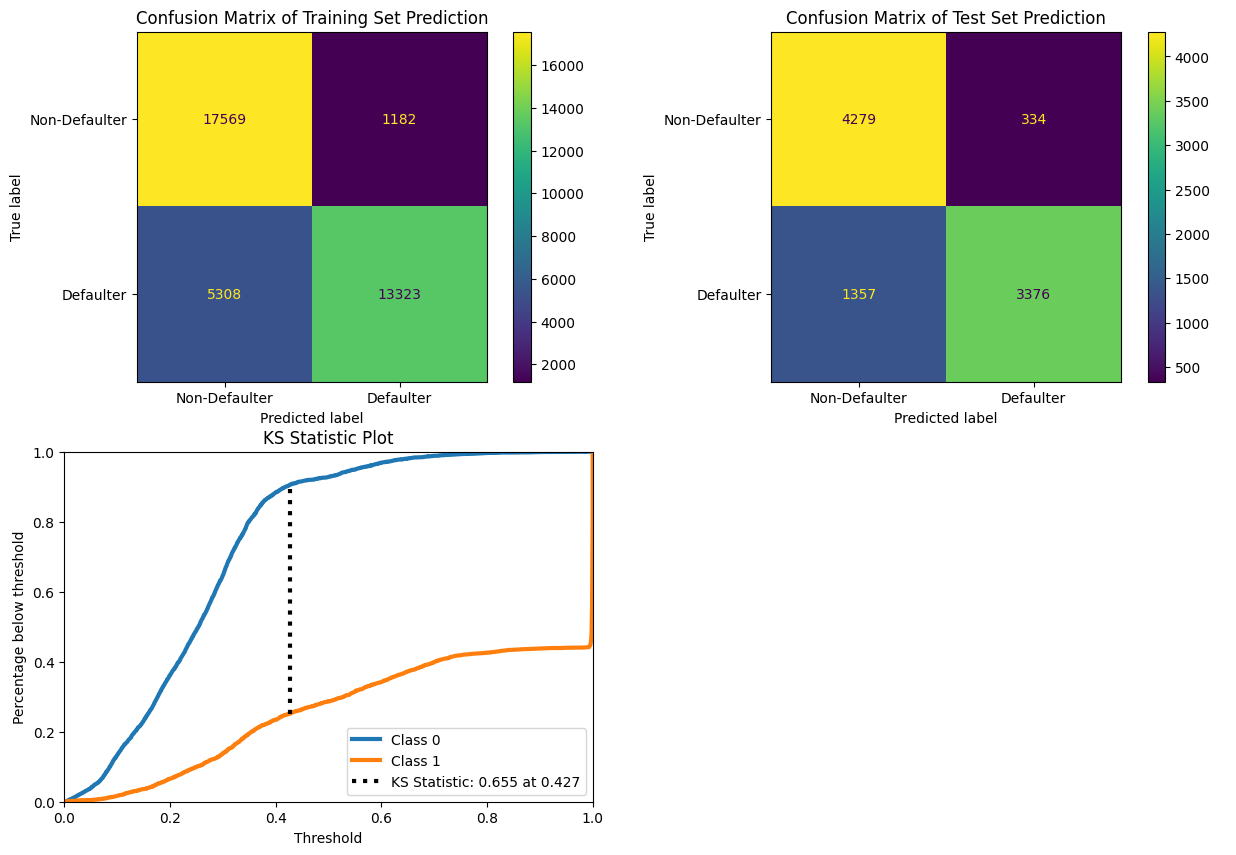

In [135]:
#visualize the model performence
model_vis(y_train,y_test,y_pred_train,y_pred_test,lr_proba)

* There is similar outcome of training set and test set.
* According to the test set, around 90% of all defaulters are correctly anticipated, and approximately 70% of all defaulters are successfully predicted.
* 0.655 is going to be our threshold. We begin the solution of the business case by considering as potential defaulters all the observations with a predicted probability of defaulting greater than 0.274

In [136]:
#create an empty dataframe with columns name of metric chart
metrics_df=pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','KS_Stat'])
def metric_score(model_name,y_test,y_pred_test,y_proba):
  '''
  This Function will detremine model evalation metrics with a dataframe
  '''
  #accuracy
  acc = accuracy_score(y_test, y_pred_test)
  #precision
  prec = precision_score(y_test, y_pred_test)
  #recall
  rec = recall_score(y_test,y_pred_test)
  #f1-score
  f1 = f1_score(y_test, y_pred_test)
  #create a dataframe for ks stat calculation
  df = pd.DataFrame()
  df['real'] = y_test
  df['proba'] = y_proba[:, 1]

   # Recover each class
  class0 = df[df['real'] == 0]
  class1 = df[df['real'] == 1]

  ks = ks_2samp(class0['proba'], class1['proba'])
  stat=round(ks[0],3)
  #dataframe of all metric score

  eval_metrics_list =[model_name, acc,prec,rec, f1,stat]
  metrics_df.loc[len(metrics_df)]=eval_metrics_list
  return metrics_df

In [137]:
#view all the metric score in a dataframe
metric_score('Logistic_Regression',y_test,y_pred_test,lr_proba)

Model  Accuracy  Precision   Recall  F1 Score  KS_Stat
0  Logistic_Regression  0.819067   0.909973  0.71329  0.799716    0.655

#### 2. Cross- Validation & Hyperparameter Tuning

In [138]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lr=LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5] }
lr_cv=GridSearchCV(lr, param_grid, scoring = 'recall',n_jobs = -1, verbose = 3, cv = 5)
# Fit the Algorithm
lr_cv.fit(X_train_scaled,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [139]:
#Best parameters
print('Best parameters:', lr_cv.best_params_)
lr_best=lr_cv.best_estimator_

#predicting the probabilities of test data
lr_best_proba=model_lr.predict_proba(X_test_scaled)

 #predicting the values of y from x via model
y_best_pred_test = lr_best.predict(X_test_scaled)
y_best_pred_train = lr_best.predict(X_train_scaled)

Best parameters: {'C': 0.001, 'penalty': 'l2'}


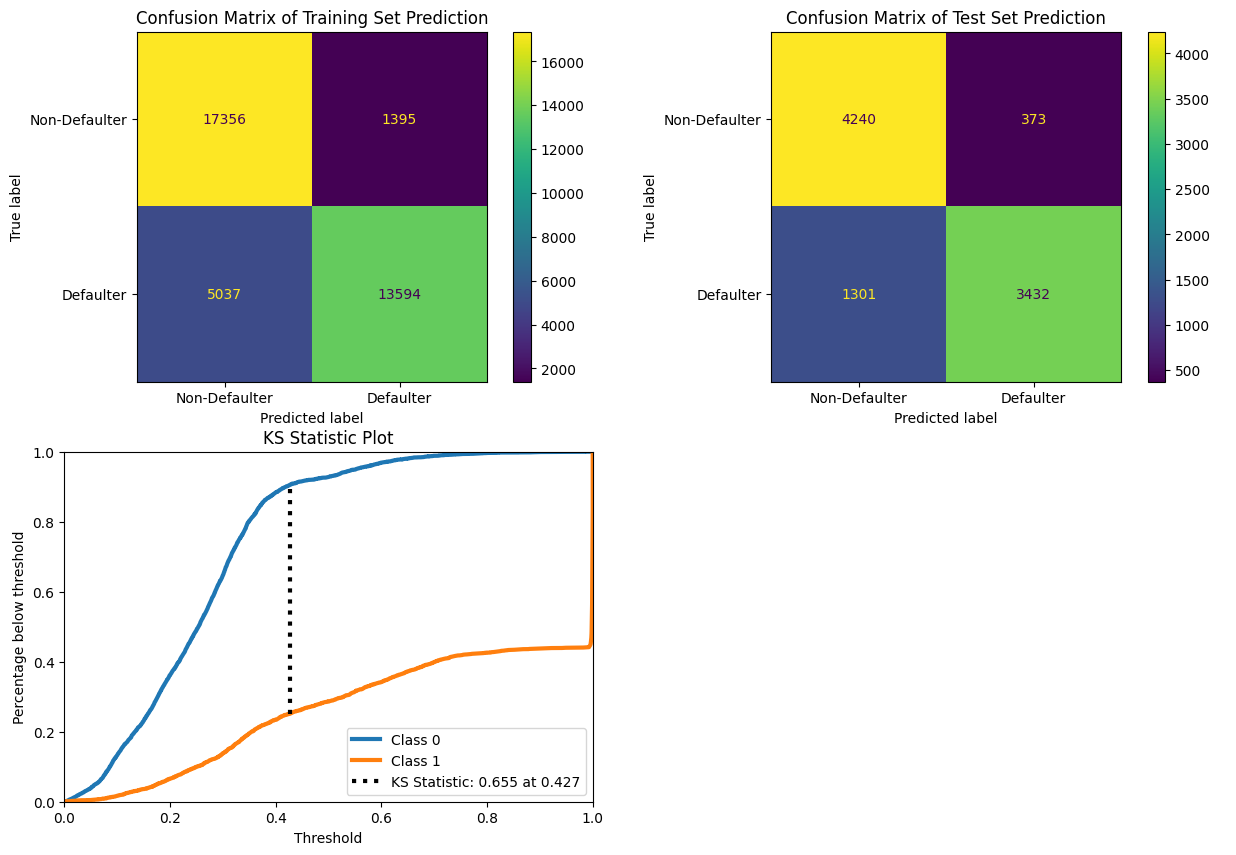

In [140]:
#visualize the model performence
model_vis(y_train,y_test,y_best_pred_train,y_best_pred_test,lr_best_proba)

In [141]:
#view all the metric score in a dataframe
metric_score('Tuned Logistic_Regression',y_test,y_best_pred_test,lr_best_proba)

Model  Accuracy  Precision    Recall  F1 Score  KS_Stat
0        Logistic_Regression  0.819067   0.909973  0.713290  0.799716    0.655
1  Tuned Logistic_Regression  0.820886   0.901971  0.725121  0.803935    0.655

##### Which hyperparameter optimization technique have you used and why?

I used GridSearch CV to discover the best parameters for the model in order to improve its accuracy. GridSearchCV is the process of tweaking hyperparameters to determine the best values for a particular model.The value of hyperparameters has a substantial impact on model performance.

GridSearchCV examines the model for each combination of the values supplied in the dictionary using the Cross-Validation technique. As a result of utilising this function, we can calculate the accuracy/loss for each combination of hyperparameters and select the one with the best performance.






##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We can observe from the above that, with the exception of the ks statictics value, all evaluation parameters have changed. Only precision has been significantly reduced, while the rest have been slightly increased.Because the model dependant data is unbalanced and our target population is small in contrast to the non-target population, we prioritised recall value improvement.We can say that model performance has not improved significantly because the recall value  has increased slightly after adjustment.






### ML Model - 2 Decision Tree Classifier

In [142]:
# ML Model - 1 Implementation
model_dt=DecisionTreeClassifier(criterion="gini",random_state=100,min_samples_leaf=10,max_depth=10)

# Fit the Algorithm
model_dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=100)

In [143]:
#predicting the probabilities of test data
dt_proba=model_dt.predict_proba(X_test_scaled)
 #predicting the values of y from x via model
y_pred_test = model_dt.predict(X_test_scaled)
y_pred_train = model_dt.predict(X_train_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

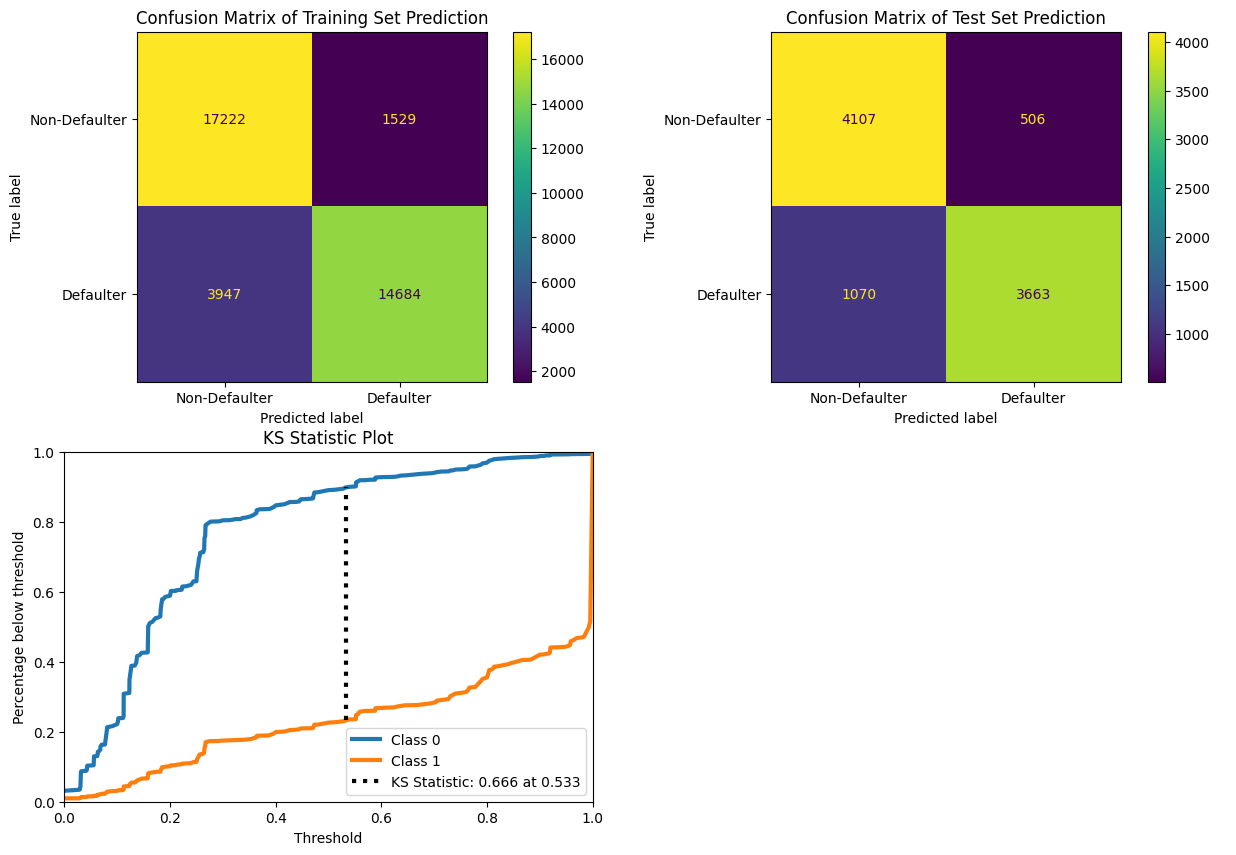

In [144]:
#visualize the model performence
model_vis(y_train,y_test,y_pred_train,y_pred_test,dt_proba)

In [145]:
#view all the metric score in a dataframe
metric_score('Decision_Tree_Classifier',y_test,y_pred_test,dt_proba)

Model  Accuracy  Precision    Recall  F1 Score  KS_Stat
0        Logistic_Regression  0.819067   0.909973  0.713290  0.799716    0.655
1  Tuned Logistic_Regression  0.820886   0.901971  0.725121  0.803935    0.655
2   Decision_Tree_Classifier  0.831372   0.878628  0.773928  0.822961    0.666

#### 2. Cross- Validation & Hyperparameter Tuning

In [146]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dt=DecisionTreeClassifier()
param_grid = param_dict = {'max_depth': [20,25,30,35],
              'min_samples_split':[0.001,0.01,0.05],
              'min_samples_leaf': [40,50,60]}
dt_cv=GridSearchCV(dt, param_grid, scoring = 'recall',n_jobs = -1, verbose = 3, cv = 5)
# Fit the Algorithm
dt_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='recall', verbose=3)

In [147]:
#Best parameters
print('Best parameters:', dt_cv.best_params_)
dt_best=dt_cv.best_estimator_

#predicting the probabilities of test data
dt_best_proba=model_dt.predict_proba(X_test_scaled)

 #predicting the values of y from x via model
y_best_pred_test = dt_best.predict(X_test_scaled)
y_best_pred_train = dt_best.predict(X_train_scaled)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 40, 'min_samples_split': 0.001}


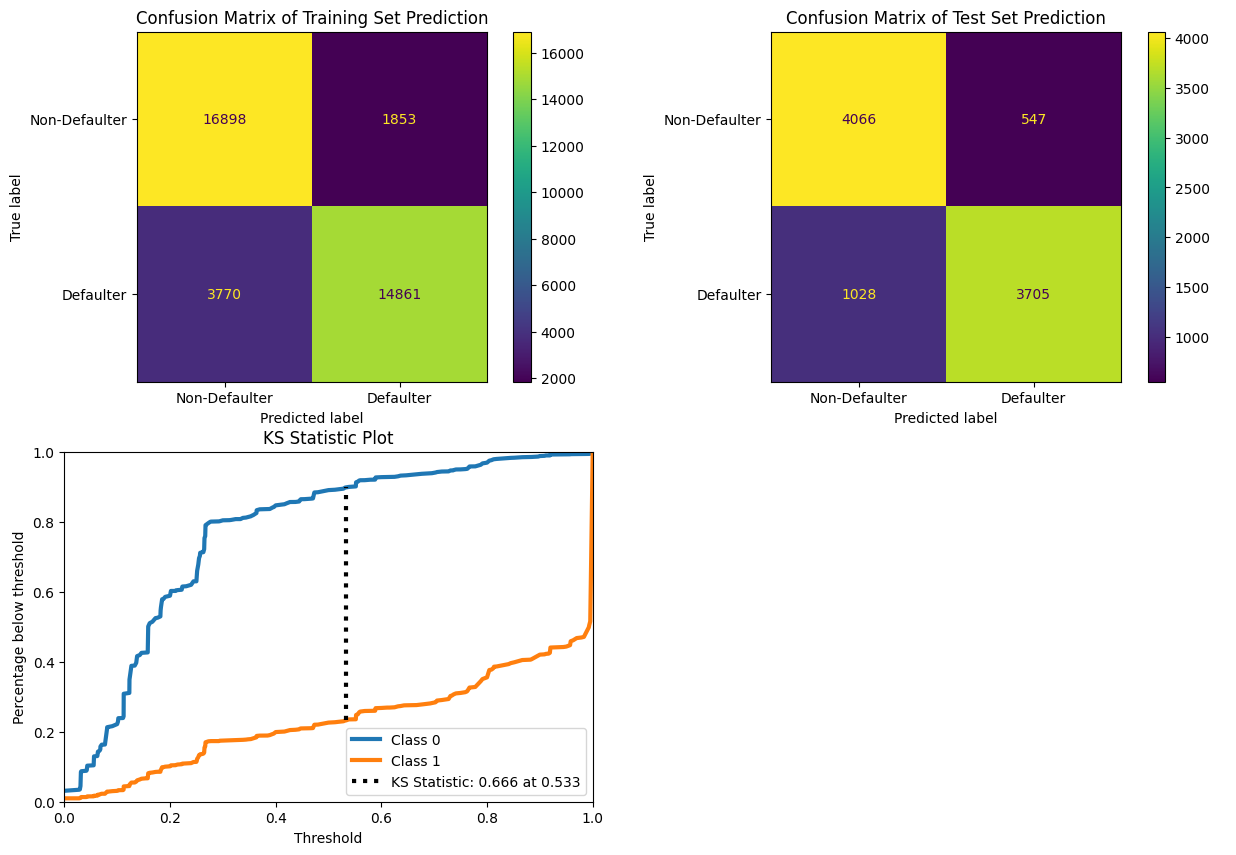

In [148]:
#visualize the model performence
model_vis(y_train,y_test,y_best_pred_train,y_best_pred_test,dt_best_proba)

In [149]:
#view all the metric score in a dataframe
metric_score('Tuned Decision_Tree_Classifier',y_test,y_best_pred_test,dt_best_proba)

Model  Accuracy  Precision    Recall  F1 Score  \
0             Logistic_Regression  0.819067   0.909973  0.713290  0.799716   
1       Tuned Logistic_Regression  0.820886   0.901971  0.725121  0.803935   
2        Decision_Tree_Classifier  0.831372   0.878628  0.773928  0.822961   
3  Tuned Decision_Tree_Classifier  0.831479   0.871355  0.782802  0.824708   

   KS_Stat  
0    0.655  
1    0.655  
2    0.666  
3    0.666

##### Which hyperparameter optimization technique have you used and why?

I used GridSearch CV to discover the best parameters for the model in order to improve its accuracy. GridSearchCV is the process of tweaking hyperparameters to determine the best values for a particular model.The value of hyperparameters has a substantial impact on model performance.

GridSearchCV examines the model for each combination of the values supplied in the dictionary using the Cross-Validation technique. As a result of utilising this function, we can calculate the accuracy/loss for each combination of hyperparameters and select the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We can observe from the above that, with the exception of the ks statictics value, all evaluation parameters have changed. Only precision has been significantly reduced, while the rest have been slightly increased.We can say that model performance has not improved significantly because the recall value has slightly increased after adjustment.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I'll be using Recall primarily for model evaluation because False Negative indicates that a person will not default when they actually do. And acknowledging defaulter clients as non-defaulters will result in a large loss for the bank, thus we must reduce False Negative, and as False Negative decreases, Recall will grow.






### ML Model - 3

In [155]:
# ML Model - 1 Implementation
model_rf= RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
# Fit the Algorithm
model_rf.fit(X_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [156]:
#predicting the probabilities of test data
rf_proba=model_rf.predict_proba(X_test_scaled)
 #predicting the values of y from x via model
y_pred_test = model_rf.predict(X_test_scaled)
y_pred_train = model_rf.predict(X_train_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

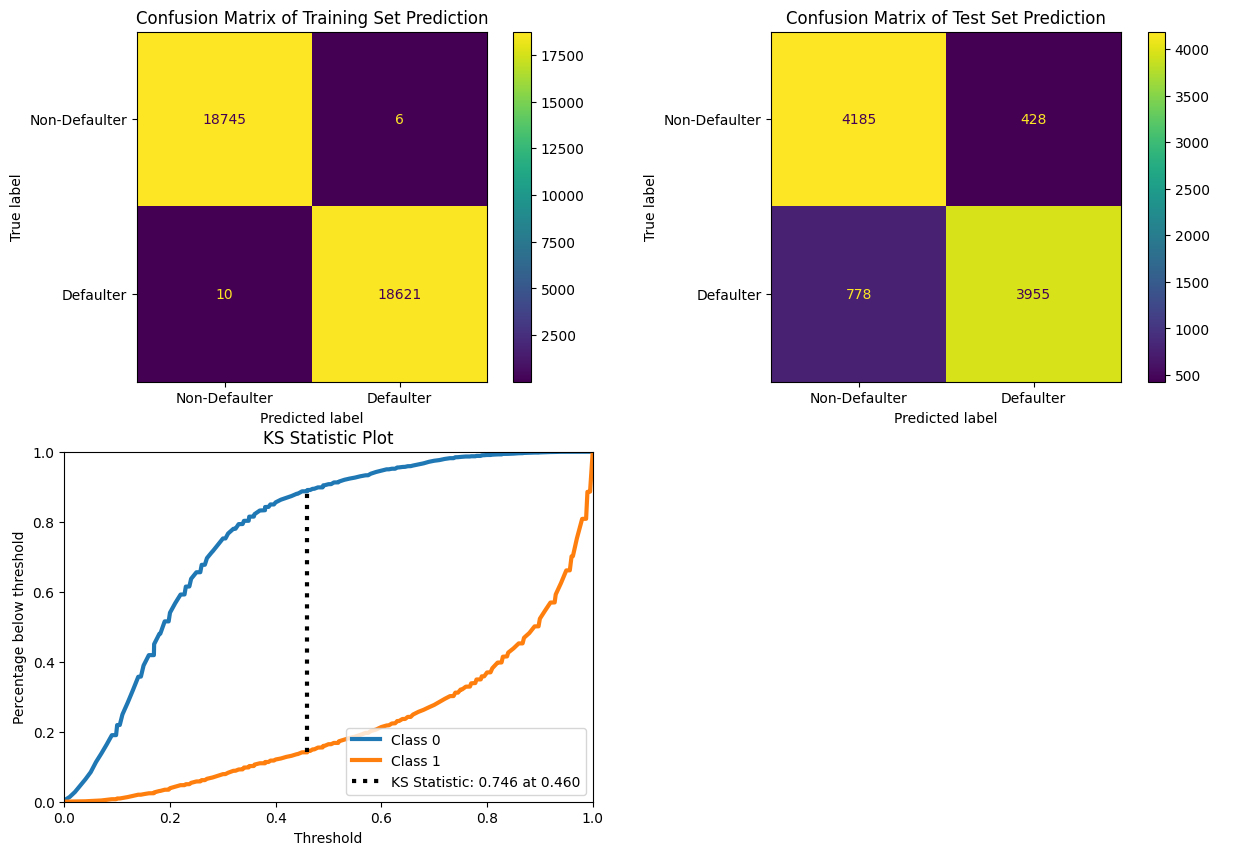

In [157]:
#visualize the model performence
model_vis(y_train,y_test,y_pred_train,y_pred_test,rf_proba)

In [158]:
#view all the metric score in a dataframe
metric_score('Random_Forrest_Classifier',y_test,y_pred_test,rf_proba)

Model  Accuracy  Precision    Recall  F1 Score  \
0             Logistic_Regression  0.819067   0.909973  0.713290  0.799716   
1       Tuned Logistic_Regression  0.820886   0.901971  0.725121  0.803935   
2        Decision_Tree_Classifier  0.831372   0.878628  0.773928  0.822961   
3  Tuned Decision_Tree_Classifier  0.831479   0.871355  0.782802  0.824708   
4       Random_Forrest_Classifier  0.870961   0.902350  0.835622  0.867705   

   KS_Stat  
0    0.655  
1    0.655  
2    0.666  
3    0.666  
4    0.746

#### 2. Cross- Validation & Hyperparameter Tuning

In [159]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf=RandomForestClassifier()
param_grid = {'n_estimators' : [100,150,200],
              'max_depth' : [10,20,30],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}
rf_cv=GridSearchCV(rf, param_grid, scoring = 'recall',n_jobs = -1, verbose = 3, cv = 5)
# Fit the Algorithm
rf_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='recall', verbose=3)

In [160]:
#Best parameters
print('Best parameters:', rf_cv.best_params_)
rf_best=rf_cv.best_estimator_

#predicting the probabilities of test data
rf_best_proba=model_rf.predict_proba(X_test_scaled)

 #predicting the values of y from x via model
y_best_pred_test = rf_best.predict(X_test_scaled)
y_best_pred_train = rf_best.predict(X_train_scaled)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 150}


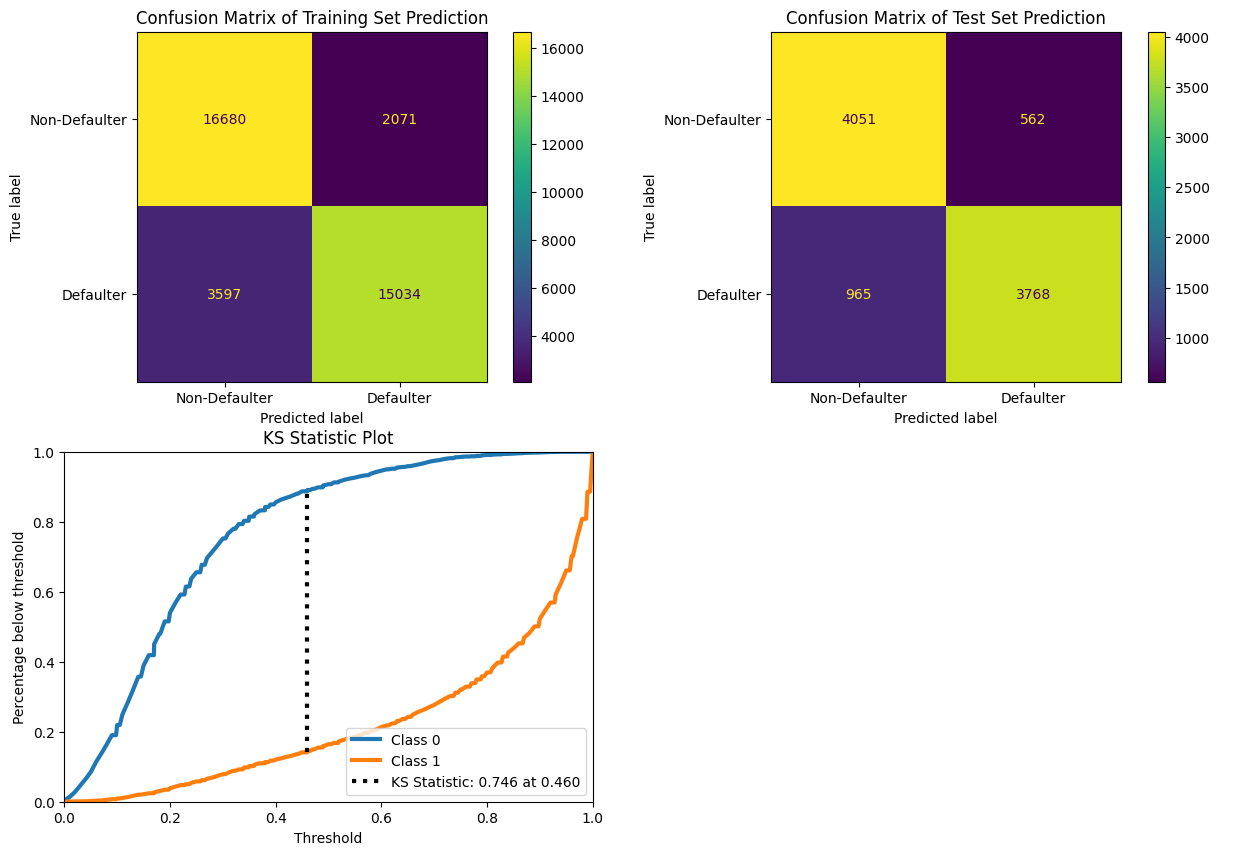

In [161]:
#visualize the model performence
model_vis(y_train,y_test,y_best_pred_train,y_best_pred_test,rf_best_proba)

In [162]:
#view all the metric score in a dataframe
metric_score('Tuned Random_Forrest_Classifier',y_test,y_best_pred_test,rf_best_proba)

Model  Accuracy  Precision    Recall  F1 Score  \
0              Logistic_Regression  0.819067   0.909973  0.713290  0.799716   
1        Tuned Logistic_Regression  0.820886   0.901971  0.725121  0.803935   
2         Decision_Tree_Classifier  0.831372   0.878628  0.773928  0.822961   
3   Tuned Decision_Tree_Classifier  0.831479   0.871355  0.782802  0.824708   
4        Random_Forrest_Classifier  0.870961   0.902350  0.835622  0.867705   
5  Tuned Random_Forrest_Classifier  0.836615   0.870208  0.796112  0.831513   

   KS_Stat  
0    0.655  
1    0.655  
2    0.666  
3    0.666  
4    0.746  
5    0.746

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [153]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [154]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***